In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

data = pd.read_csv("fraserDataWithRGDPPC.csv", 
                   index_col=[0,1],
                  parse_dates = True)

In [2]:
# Changes the years to start from earliest to latest
years = np.array(sorted(list(set(data.index.get_level_values("Year")))))

# Creates the data range
years = pd.date_range(years[0], years[-2], freq = "AS")

# Creates countries
countries = sorted(list(set(data.index.get_level_values("ISO_Code"))))

# Names the indeces
index_names = list(data.index.names)
multi_index = pd.MultiIndex.from_product([countries, 
                                          years[:-1]], 
                                         names =data.index.names)

In [3]:
data = data.reindex(multi_index)

In [4]:
# Calculates the log value by the RGDP Per Capita column
data['RGDP Per Capita Log Value'] = np.log(data["RGDP Per Capita"])

In [5]:
# Makes sure lag variables are sorted correctly
# Chooses RGDP Per Capita Log Value from ISO_Code
# .shift moves values down one
data["RGDP Per Capita Lag"] = data.groupby("ISO_Code")["RGDP Per Capita Log Value"].shift()

In [6]:
y_var = ["RGDP Per Capita Log Value"]
x_vars = ["RGDP Per Capita",
         "Size of Government",
         "Legal System & Property Rights",
         "Sound Money",
         "Freedom to trade internationally",
         "Regulation"]
# Creates dataframe for the variables
reg_vars = y_var + x_vars
reg_data = data[reg_vars].dropna()
reg_data

RGDP Per Capita Log Value  RGDP Per Capita  \
ISO_Code Year                                                     
AGO      2005-01-01                   8.120886           3364.0   
         2006-01-01                   8.424639           4558.0   
         2007-01-01                   8.578100           5314.0   
         2008-01-01                   8.751158           6318.0   
         2009-01-01                   8.558719           5212.0   
...                                        ...              ...   
ZWE      2011-01-01                   7.323171           1515.0   
         2012-01-01                   7.392032           1623.0   
         2013-01-01                   7.496097           1801.0   
         2014-01-01                   7.493874           1797.0   
         2015-01-01                   7.472501           1759.0   

                     Size of Government  Legal System & Property Rights  \
ISO_Code Year                                                             
AGO      2005-01-01            4.652865                        3.148805   
         2006-01-01            5.342913                        3.546463   
         2007-01-01            5.239228                        3.569182   
         2008-01-01            5.307379                        3.654098   
         2009-01-01            7.104953                        3.622792   
...                                 ...                             ...   
ZWE      2011-01-01            6.424630                        3.943725   
         2012-01-01            6.670469                        4.013004   
         2013-01-01            6.325105                        3.575827   
         2014-01-01            6.433165                        3.615584   
         2015-01-01            6.402772                        3.820360   

                     Sound Money  Freedom to trade internationally  Regulation  
ISO_Code Year                                                                   
AGO      2005-01-01     1.262168                          6.218266    4.729310  
         2006-01-01     4.061198                          6.158949    5.306135  
         2007-01-01     4.453327                          6.115462    5.524626  
         2008-01-01     5.032836                          5.687976    5.221726  
         2009-01-01     5.238259                          5.811844    5.011598  
...                          ...                               ...         ...  
ZWE      2011-01-01     4.109198                          5.366773    4.372878  
         2012-01-01     5.378742                          5.132305    3.661438  
         2013-01-01     6.895530                          5.589087    3.848068  
         2014-01-01     7.966798                          5.909121    3.987721  
         2015-01-01     8.180178                          5.679719    6.643620  

[2579 rows x 7 columns]

In [7]:
reg_data.corr().round(2)

RGDP Per Capita Log Value  RGDP Per Capita  \
RGDP Per Capita Log Value                              1.00             0.83   
RGDP Per Capita                                        0.83             1.00   
Size of Government                                    -0.14            -0.15   
Legal System & Property Rights                         0.75             0.68   
Sound Money                                            0.51             0.44   
Freedom to trade internationally                       0.59             0.49   
Regulation                                             0.52             0.50   

                                  Size of Government  \
RGDP Per Capita Log Value                      -0.14   
RGDP Per Capita                                -0.15   
Size of Government                              1.00   
Legal System & Property Rights                 -0.10   
Sound Money                                     0.20   
Freedom to trade internationally                0.24   
Regulation                                      0.21   

                                  Legal System & Property Rights  Sound Money  \
RGDP Per Capita Log Value                                   0.75         0.51   
RGDP Per Capita                                             0.68         0.44   
Size of Government                                         -0.10         0.20   
Legal System & Property Rights                              1.00         0.52   
Sound Money                                                 0.52         1.00   
Freedom to trade internationally                            0.63         0.68   
Regulation                                                  0.59         0.60   

                                  Freedom to trade internationally  Regulation  
RGDP Per Capita Log Value                                     0.59        0.52  
RGDP Per Capita                                               0.49        0.50  
Size of Government                                            0.24        0.21  
Legal System & Property Rights                                0.63        0.59  
Sound Money                                                   0.68        0.60  
Freedom to trade internationally                              1.00        0.65  
Regulation                                                    0.65        1.00

In [8]:
reg_data.describe().round(2)

RGDP Per Capita Log Value  RGDP Per Capita  Size of Government  \
count                    2579.00          2579.00             2579.00   
mean                        9.06         15913.65                6.35   
std                         1.21         17204.60                1.24   
min                         6.07           432.00                1.57   
25%                         8.15          3472.50                5.52   
50%                         9.21         10032.00                6.42   
75%                        10.06         23393.50                7.18   
max                        11.96        156144.00                9.51   

       Legal System & Property Rights  Sound Money  \
count                         2579.00      2579.00   
mean                             5.23         7.76   
std                              1.74         1.85   
min                              0.99         0.00   
25%                              3.96         6.74   
50%                              5.17         8.11   
75%                              6.35         9.32   
max                              9.14         9.89   

       Freedom to trade internationally  Regulation  
count                           2579.00     2579.00  
mean                               6.90        6.66  
std                                1.52        1.17  
min                                0.00        2.10  
25%                                6.18        5.93  
50%                                7.15        6.75  
75%                                7.98        7.48  
max                               10.00        9.44

In [9]:
y = reg_data[y_var]
X = reg_data[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     RGDP Per Capita Log Value   R-squared:                       0.775
Model:                                   OLS   Adj. R-squared:                  0.774
Method:                        Least Squares   F-statistic:                     1476.
Date:                       Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                               16:04:35   Log-Likelihood:                -2228.7
No. Observations:                       2579   AIC:                             4471.
Df Residuals:                           2572   BIC:                             4512.
Df Model:                                  6                                         
Covariance Type:                   nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
RGDP Per Capita                   4.054e-05    9.3e-07     43.577      0.000    3.87e-05    4.24e-05
Size of Government                  -0.0738      0.010     -7.045      0.000      -0.094      -0.053
Legal System & Property Rights       0.1656      0.011     15.718      0.000       0.145       0.186
Sound Money                          0.0419      0.009      4.778      0.000       0.025       0.059
Freedom to trade internationally     0.1227      0.012     10.125      0.000       0.099       0.146
Regulation                          -0.0359      0.014     -2.529      0.012      -0.064      -0.008
Constant                             7.0881      0.083     85.649      0.000       6.926       7.250
==============================================================================
Omnibus:                      270.710   Durbin-Watson:                   0.226
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              397.502
Skew:                          -0.788   Prob(JB):                     4.82e-87
Kurtosis:                       4.101   Cond. No.                     1.72e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# Creates the predictor
predictor = results.predict()
reg_data[y_var[0] + " Predictor"] = predictor

In [11]:
# Renaming y_var[0] for readability
y_name = y_var[0]
y_hat = reg_data[y_name + " Predictor"]
y_mean = reg_data[y_name].mean()
y = reg_data[y_name]

# Creates a residuals column
reg_data["Residuals"] = y_hat.sub(y_mean)

(array([-4., -2.,  0.,  2.,  4.,  6.,  8.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

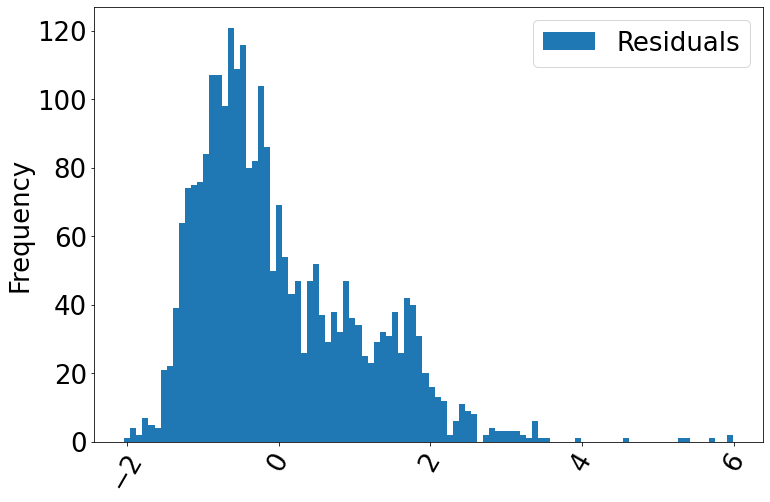

In [12]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Residuals"]].plot.hist(bins = 100, 
                                  ax = ax)
plt.xticks(rotation=60)

In [13]:
y_var = ["RGDP Per Capita Log Value"]
x_vars = ["RGDP Per Capita",
          "Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation"]

y = reg_data[y_var]
X = reg_data[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
reg_data["Predictor"] = results.predict()

<ipython-input-13-cd237a2b410f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


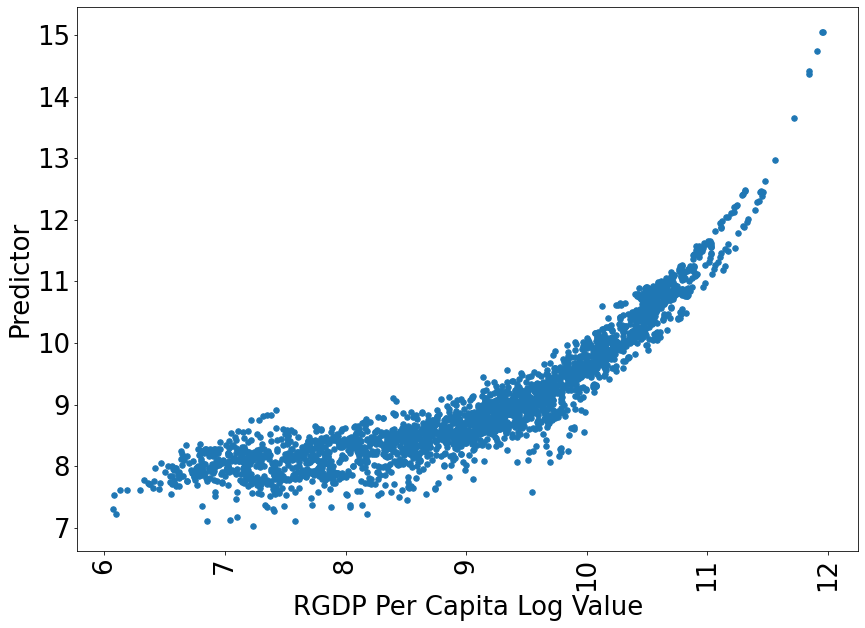

In [14]:
# Create a scatter plot for RGDP Per Capita by Predictor
fig, ax = plt.subplots(figsize = (14,10))
reg_data.plot.scatter(x = y_var[0],
                 y = "Predictor", 
                 s = 30, ax = ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

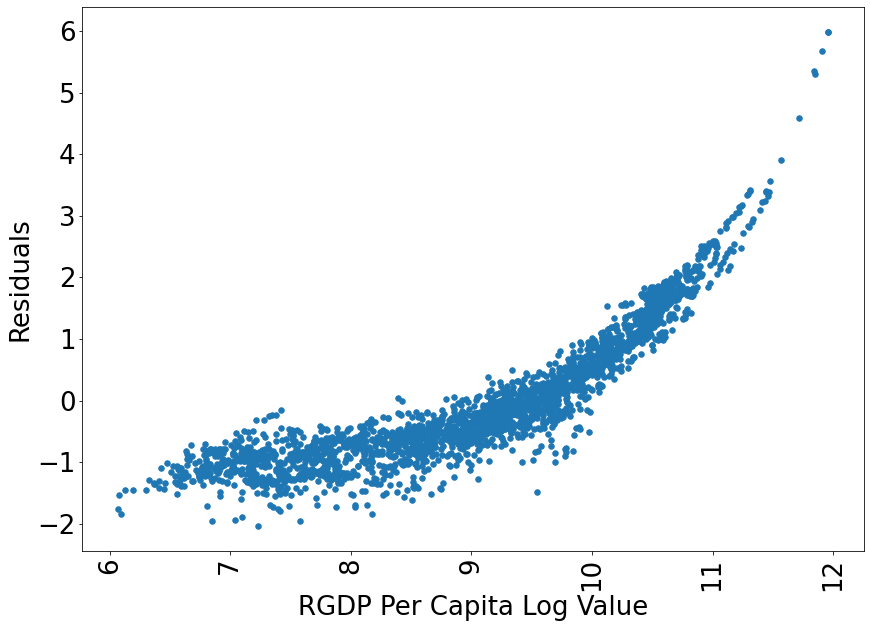

In [15]:
# Create a scatter plot for RGDP Per Capita by Residual
fig, ax = plt.subplots(figsize = (14,10))
reg_data.plot.scatter(x = y_var[0],
                 y = "Residuals", 
                 s = 30, ax = ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

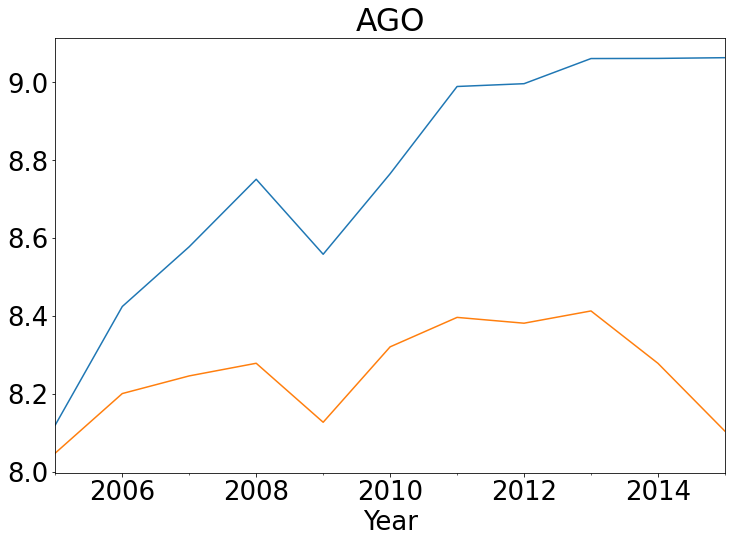

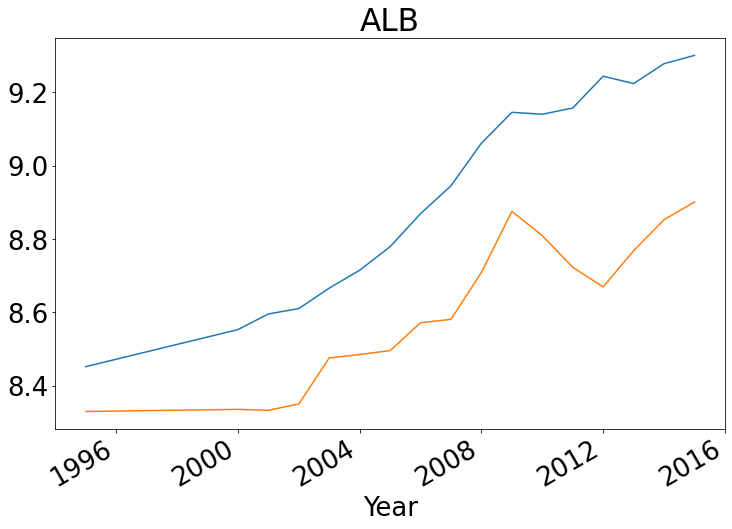

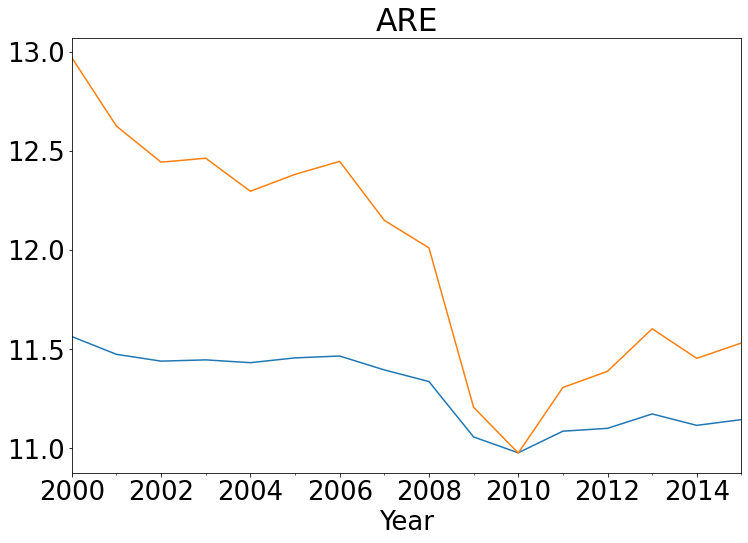

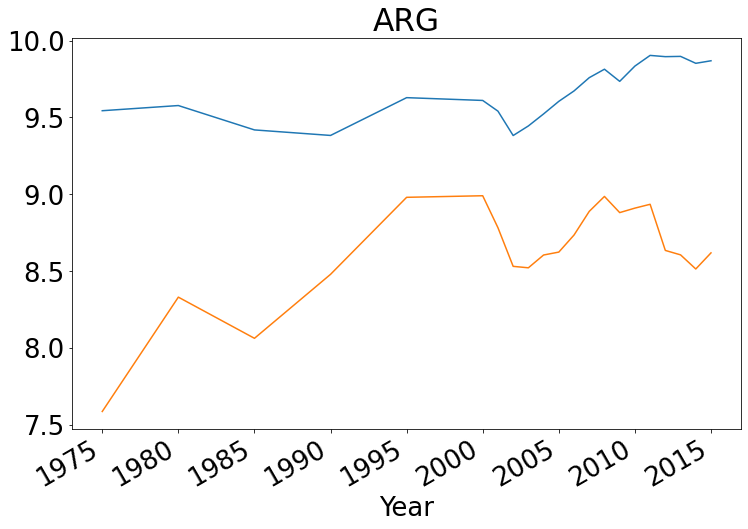

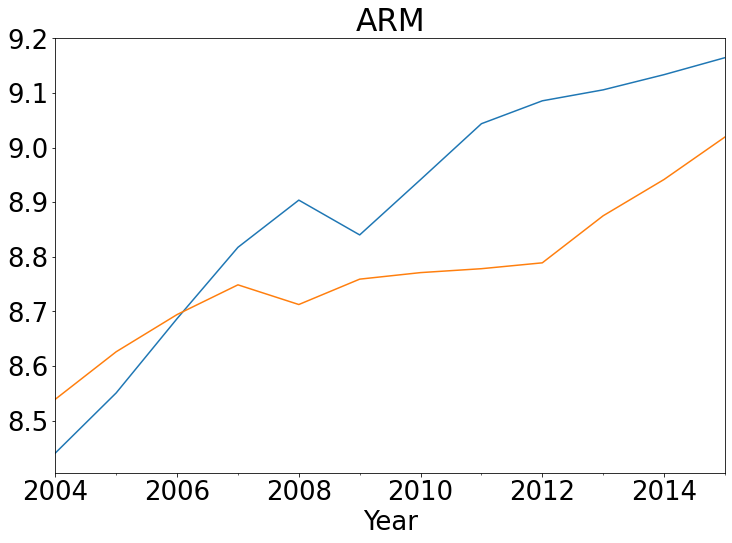

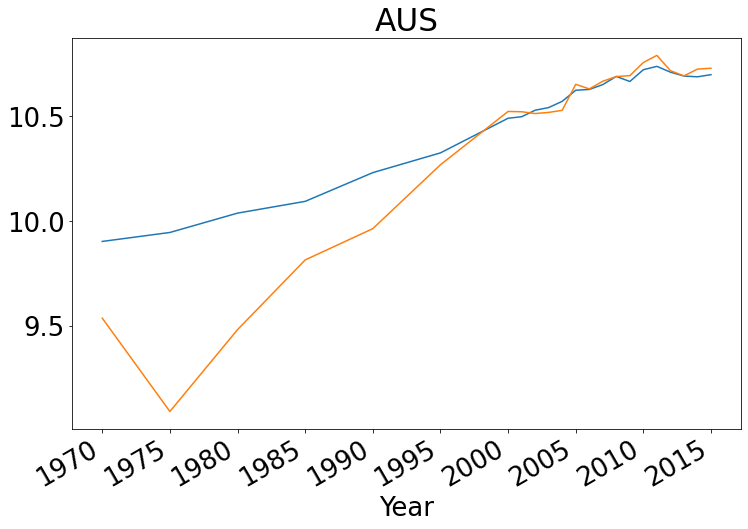

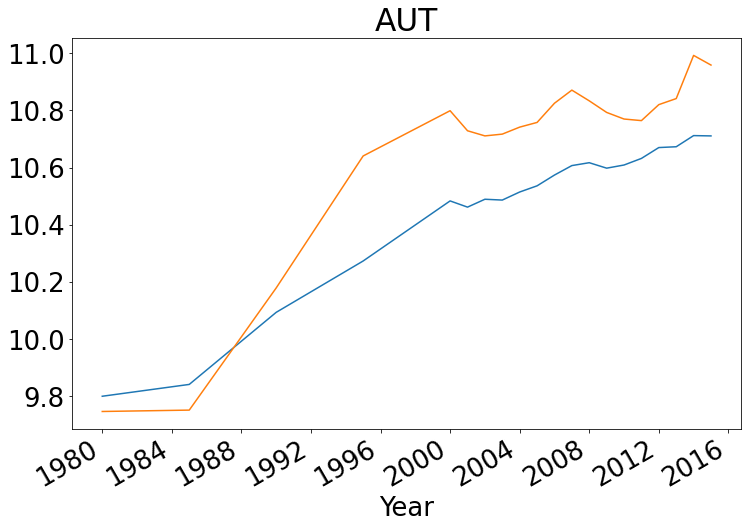

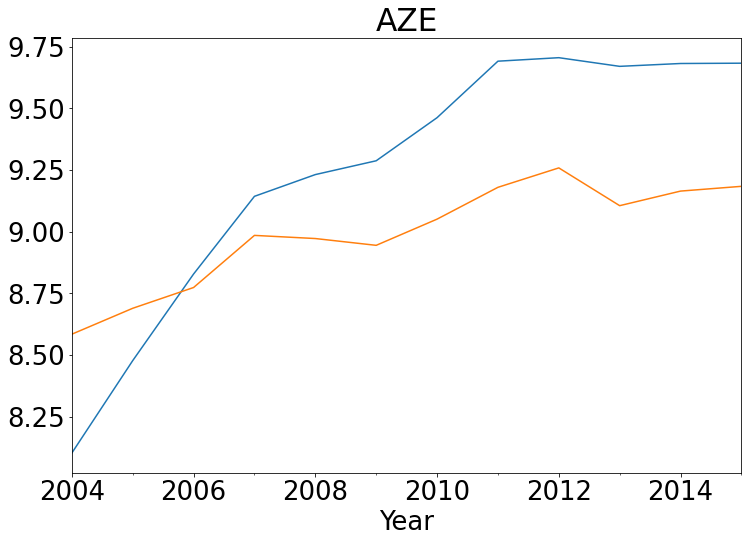

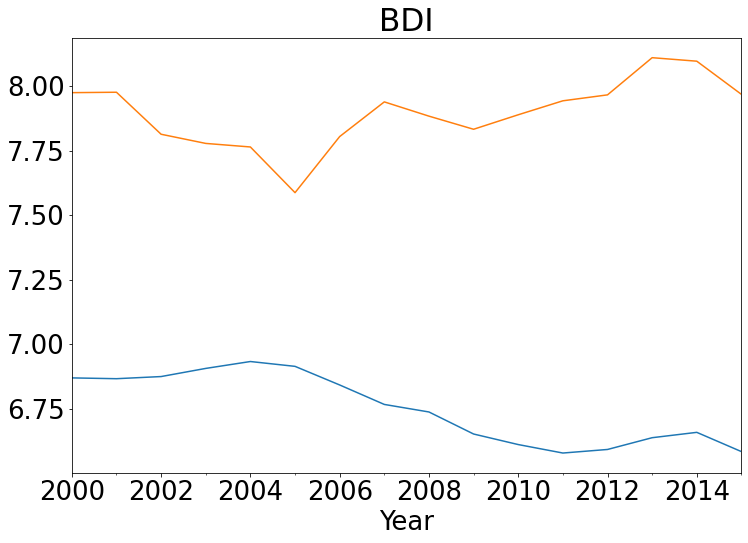

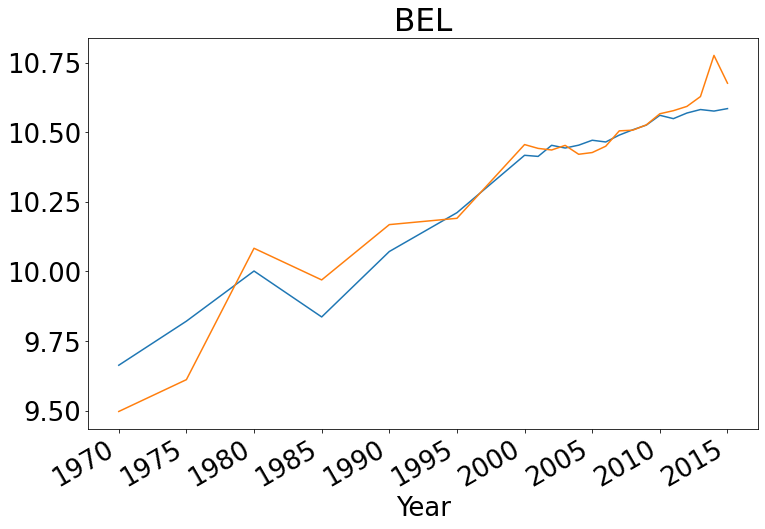

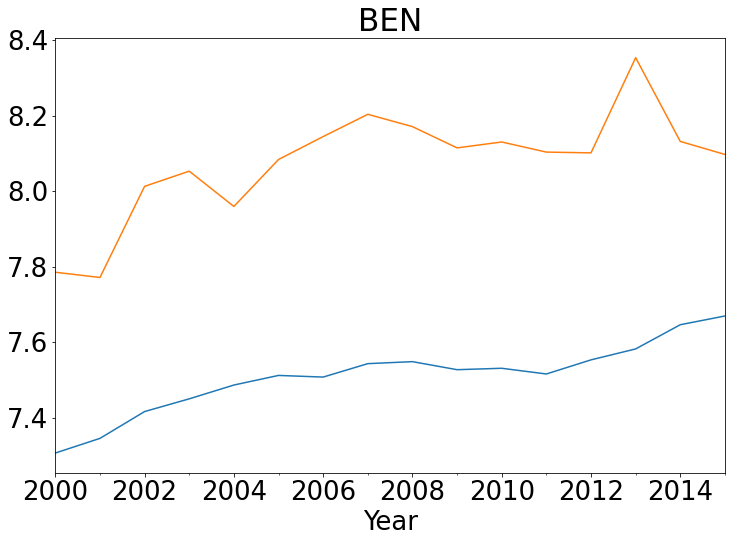

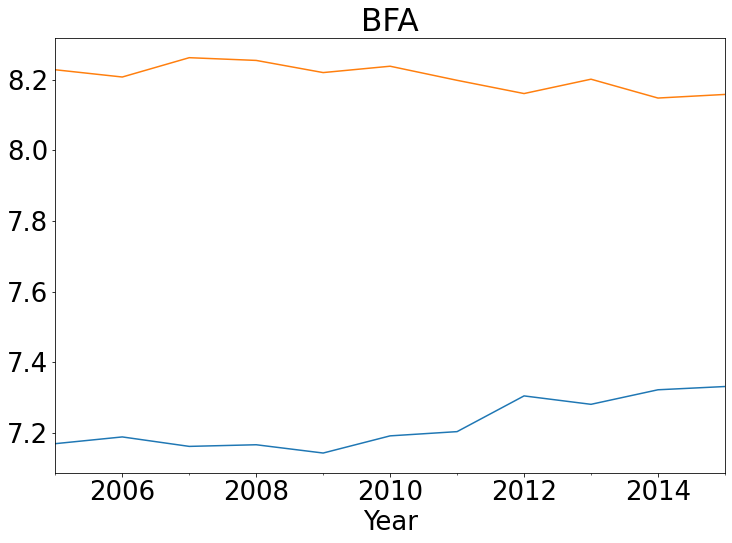

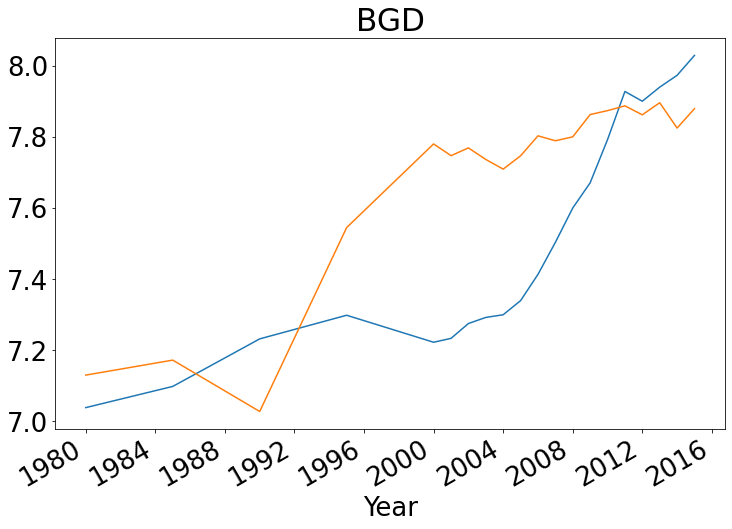

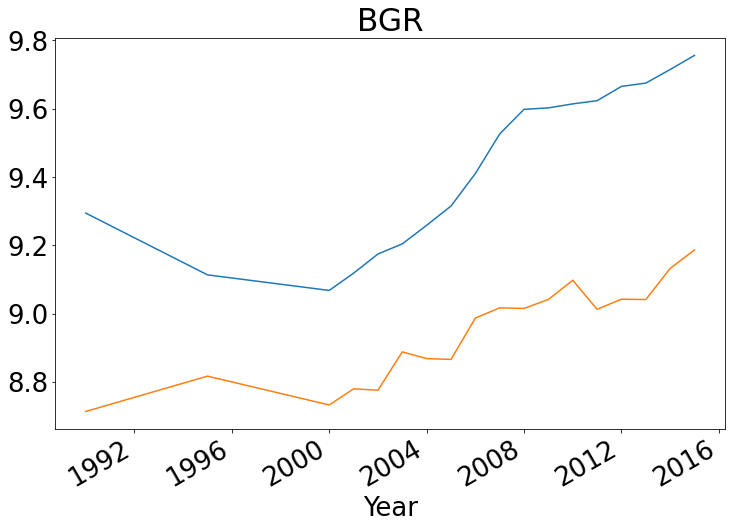

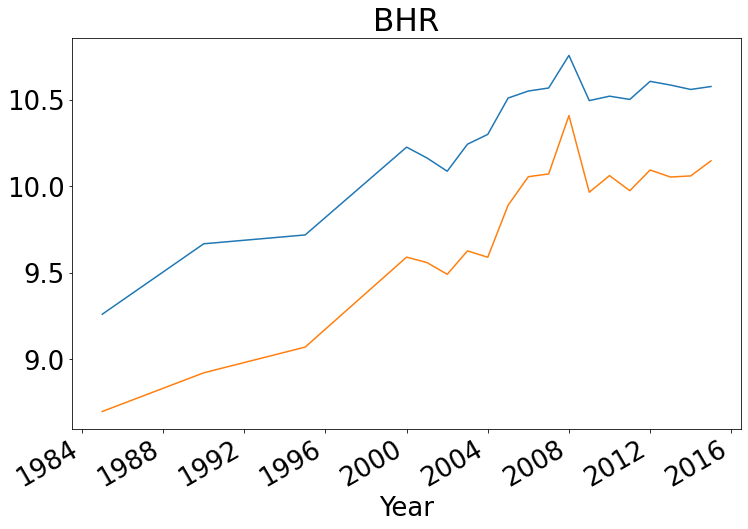

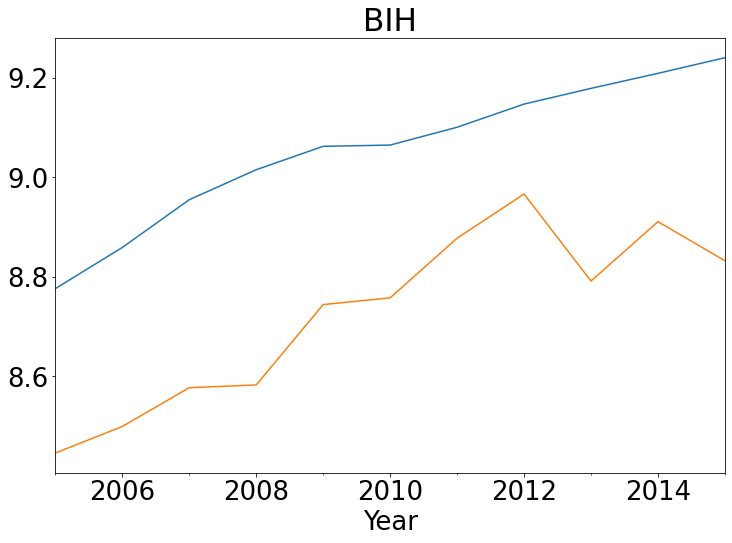

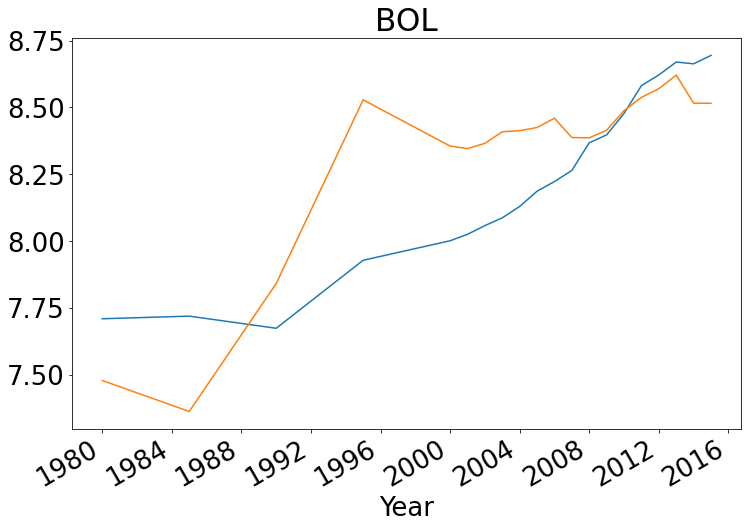

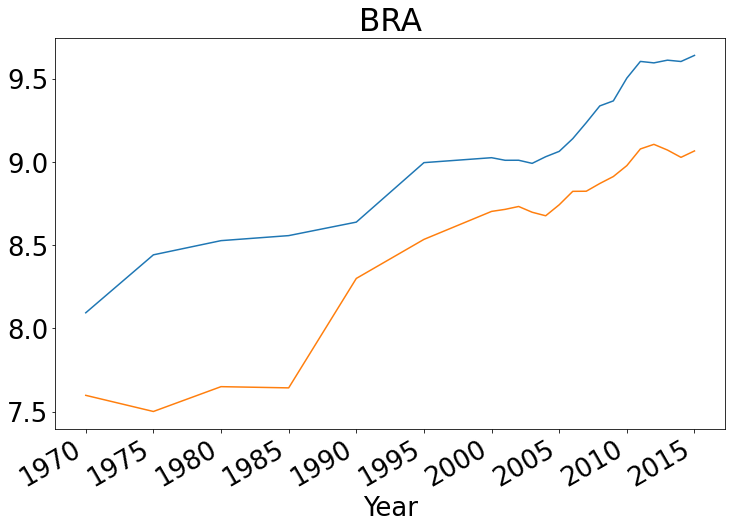

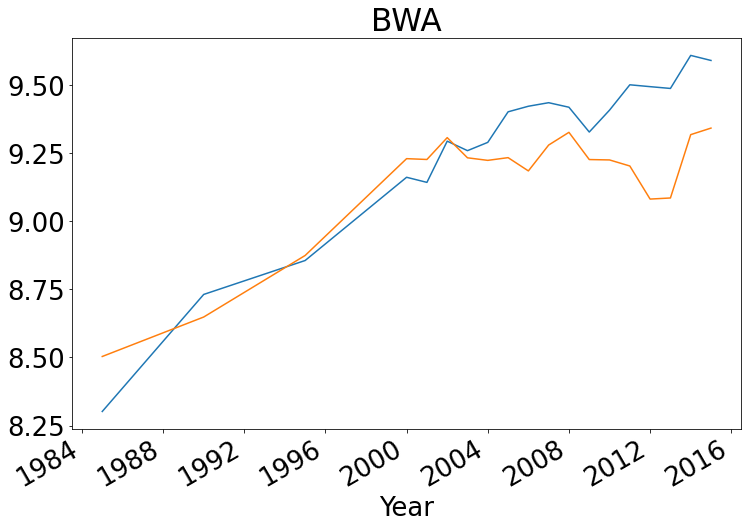

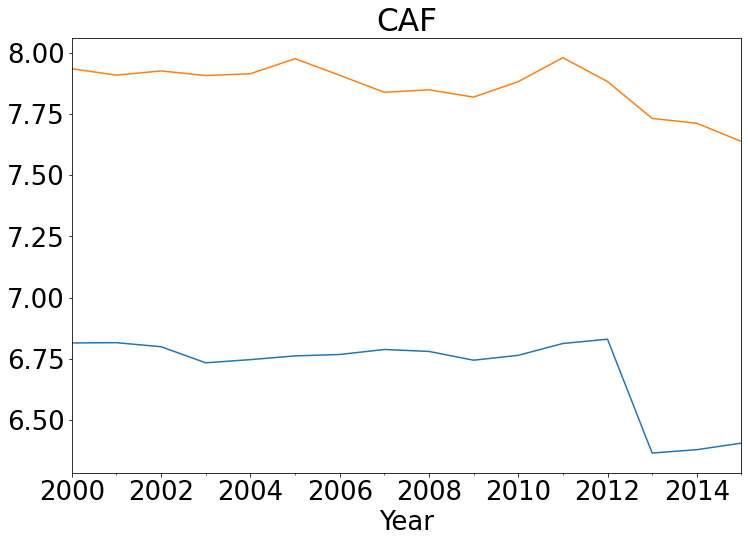

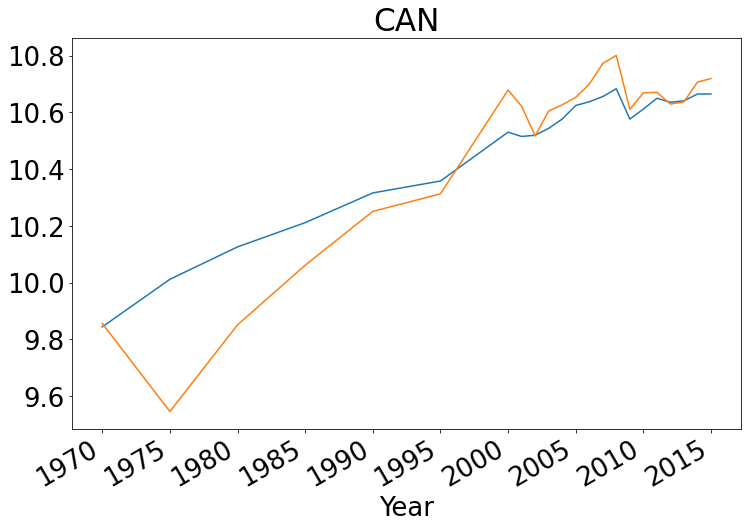

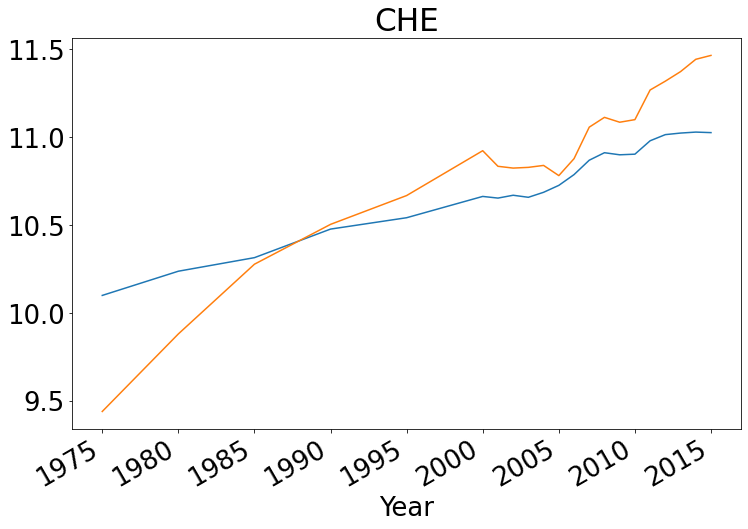

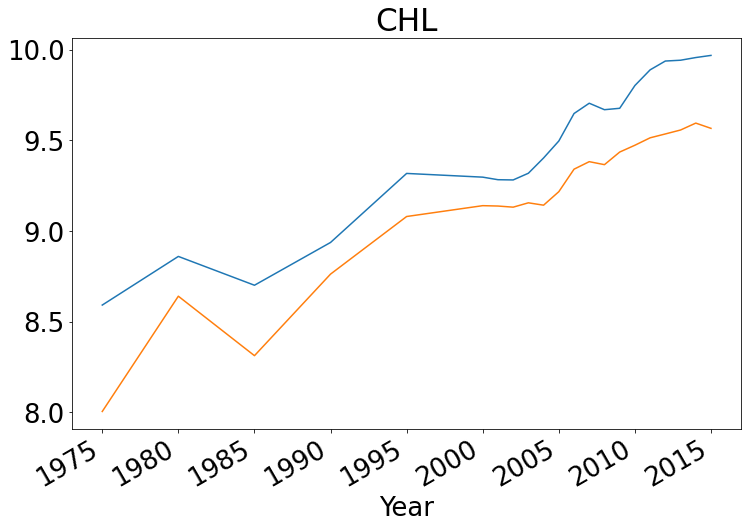

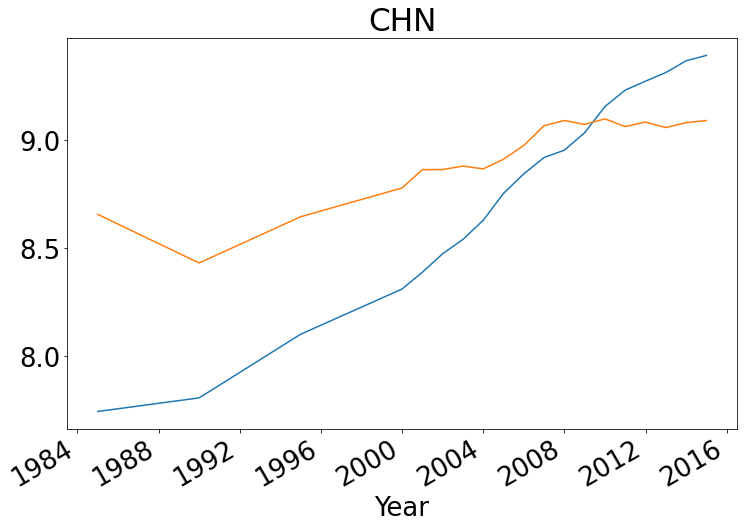

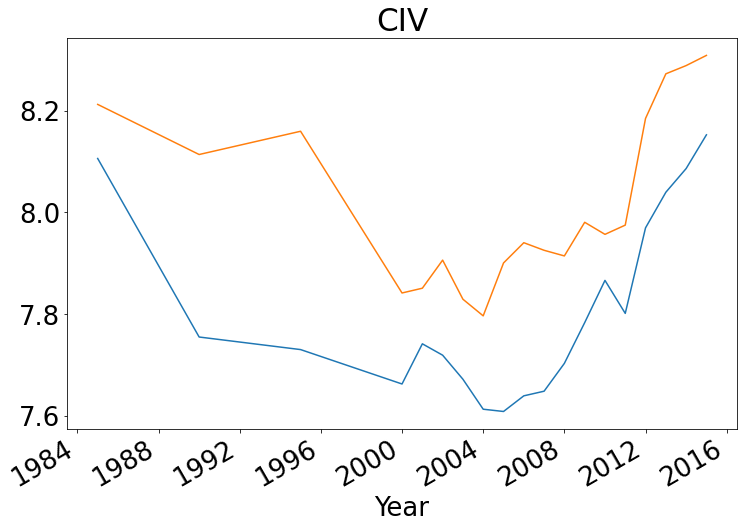

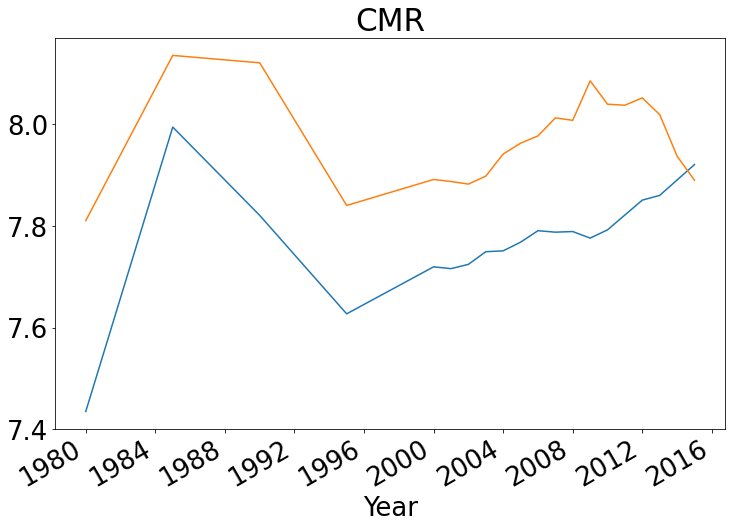

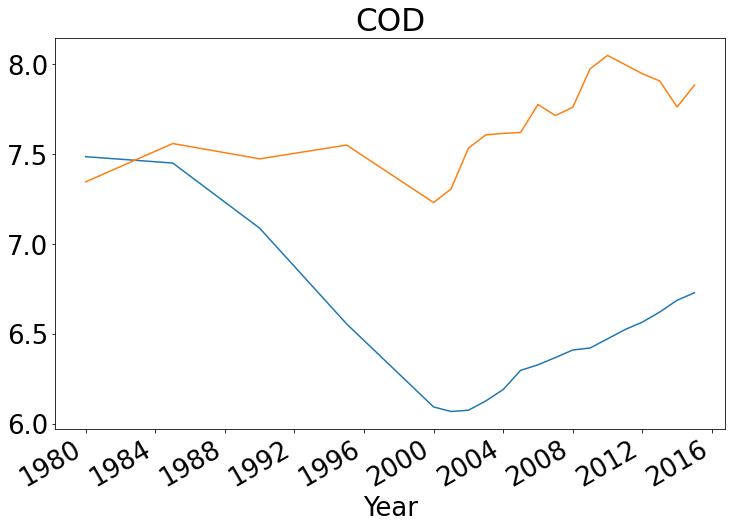

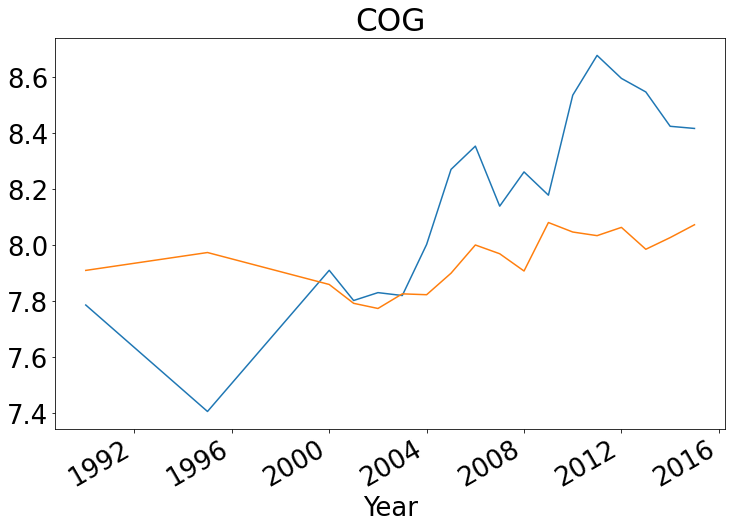

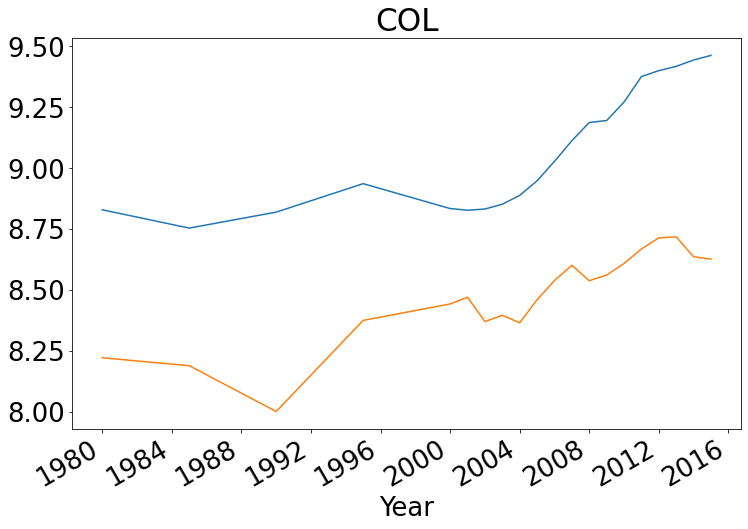

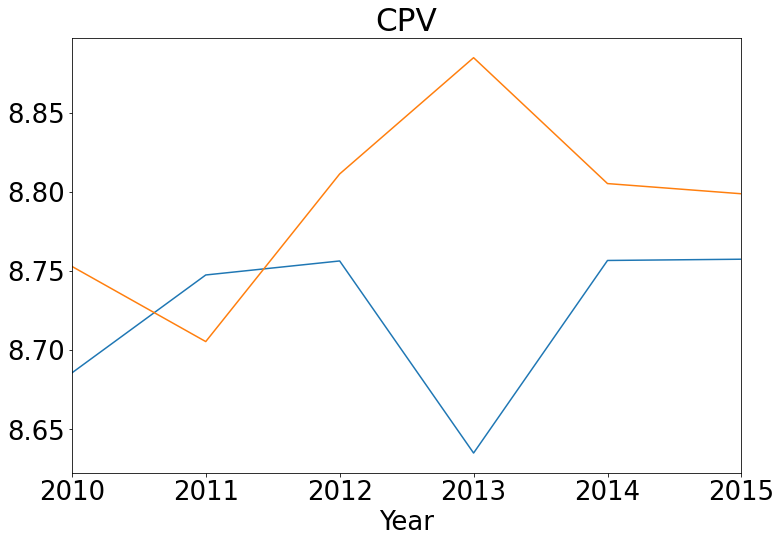

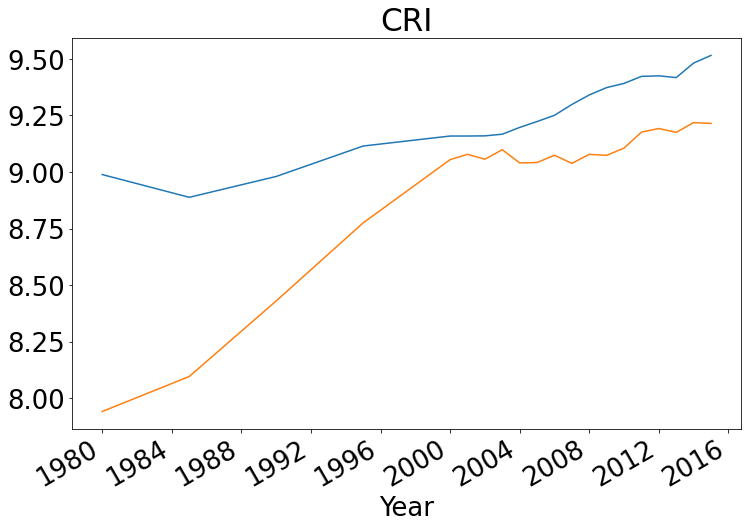

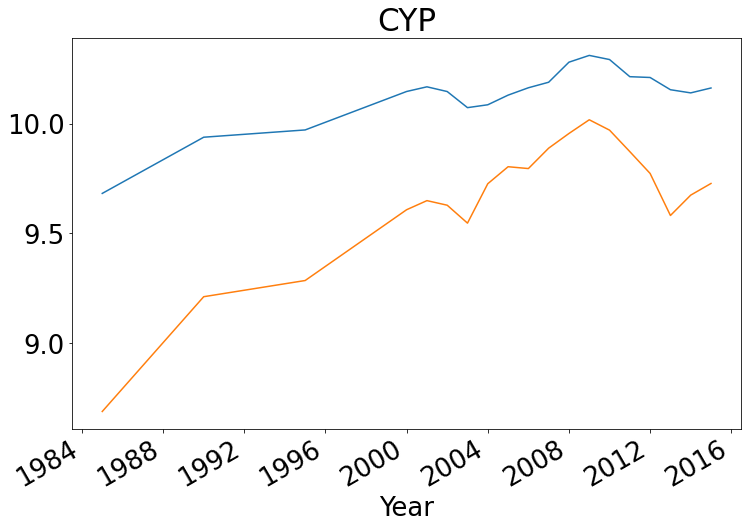

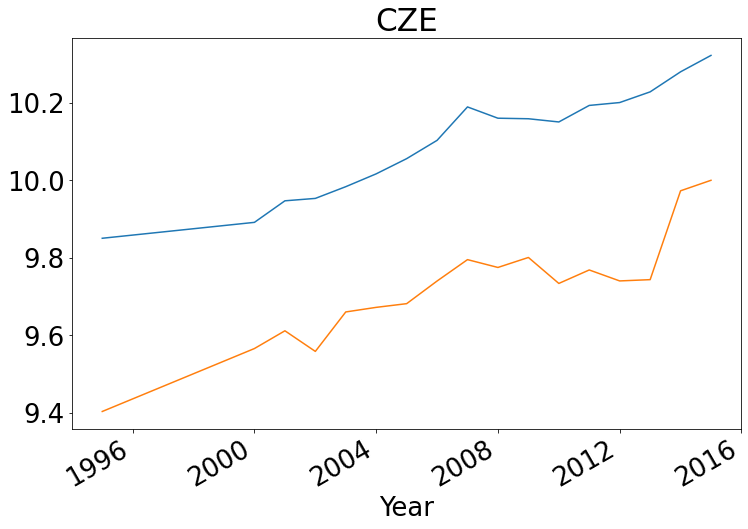

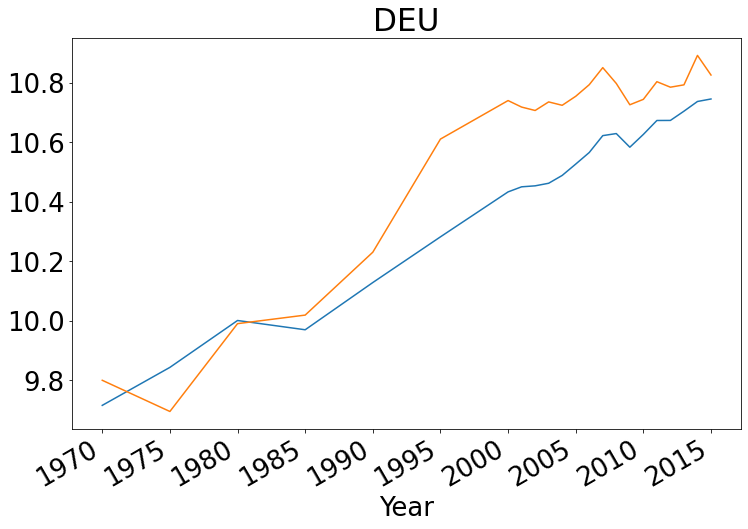

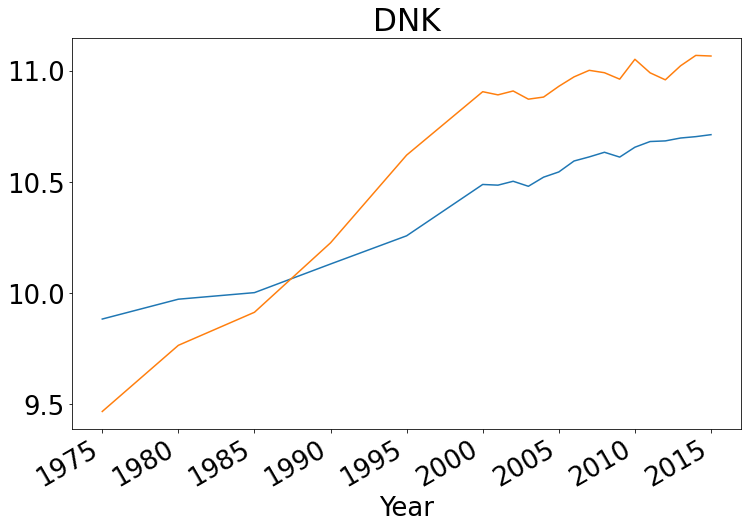

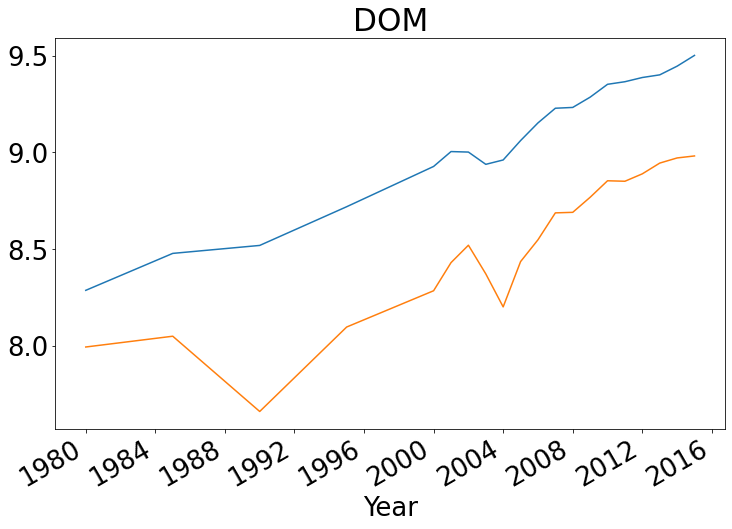

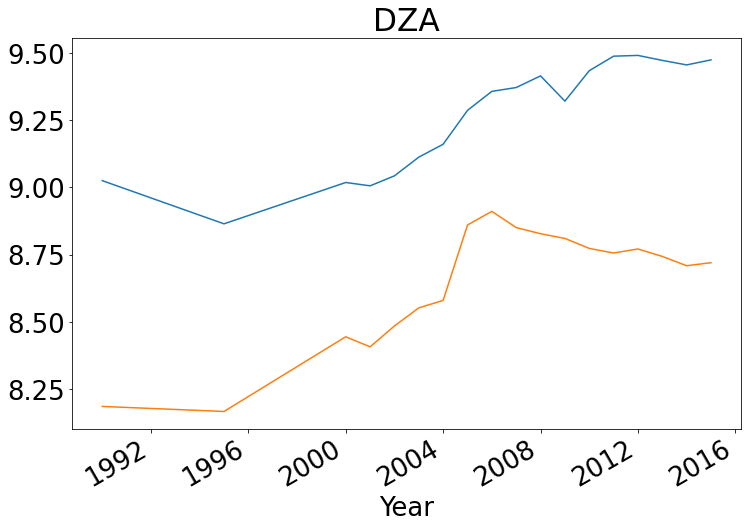

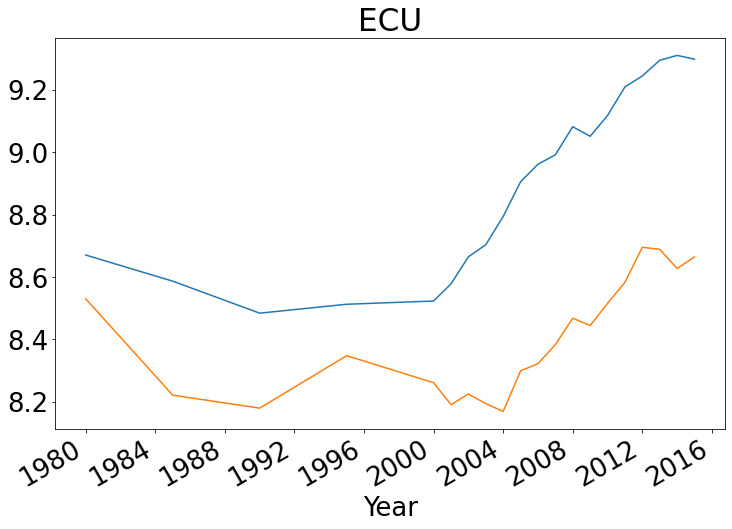

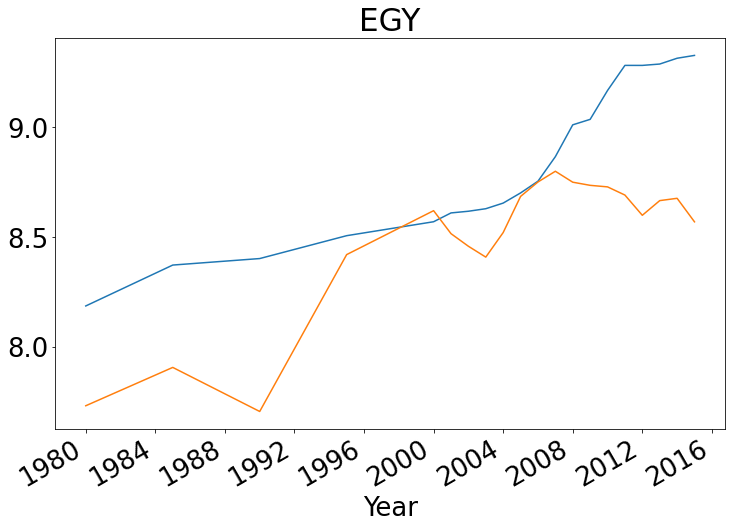

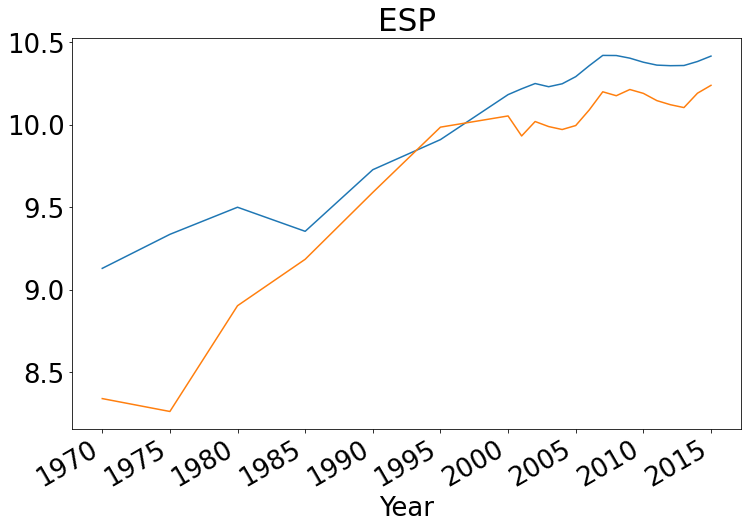

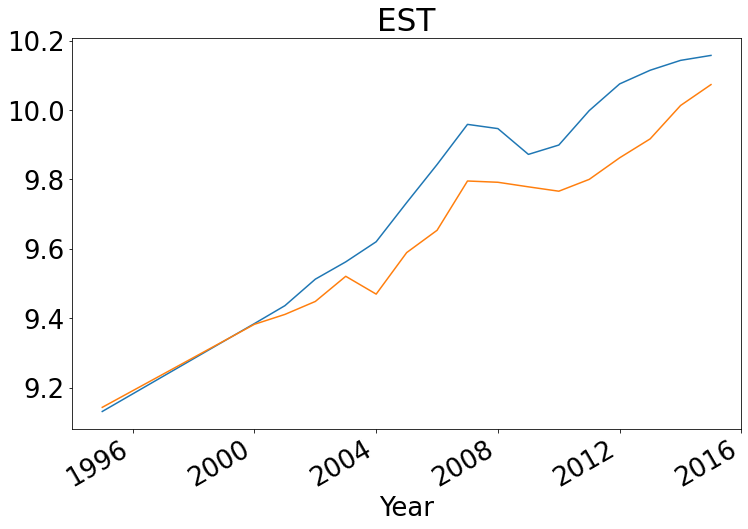

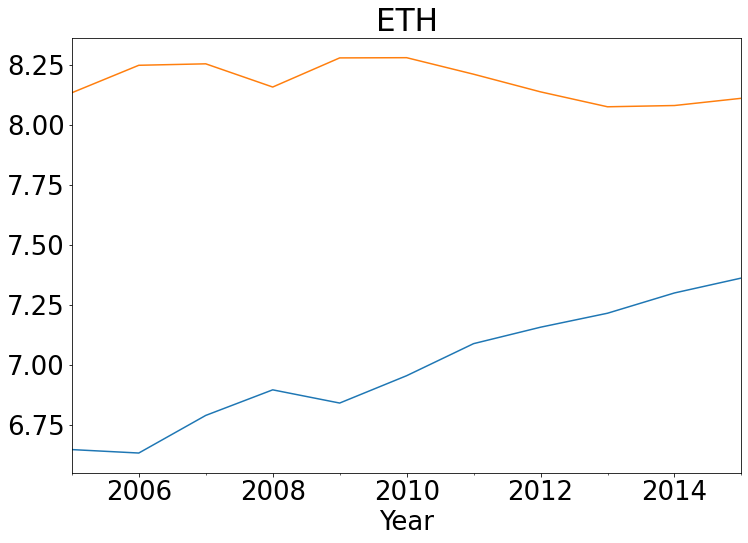

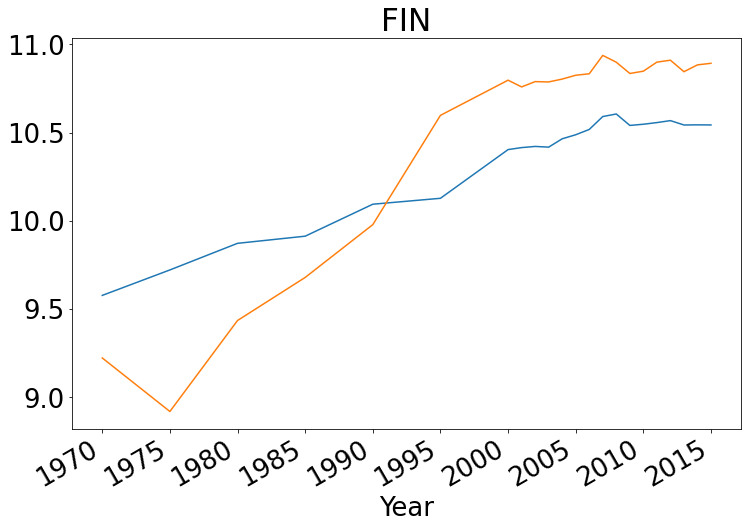

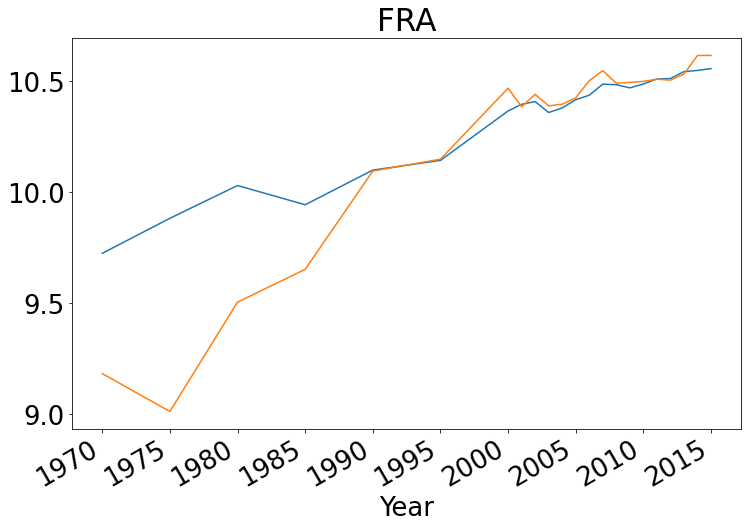

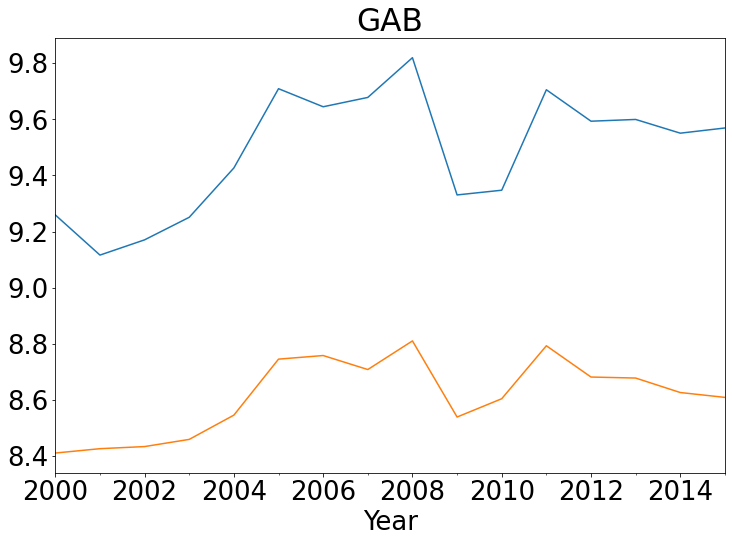

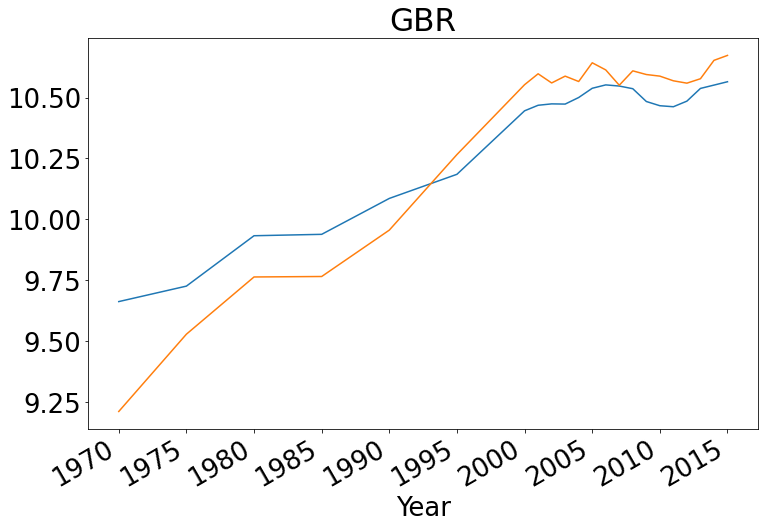

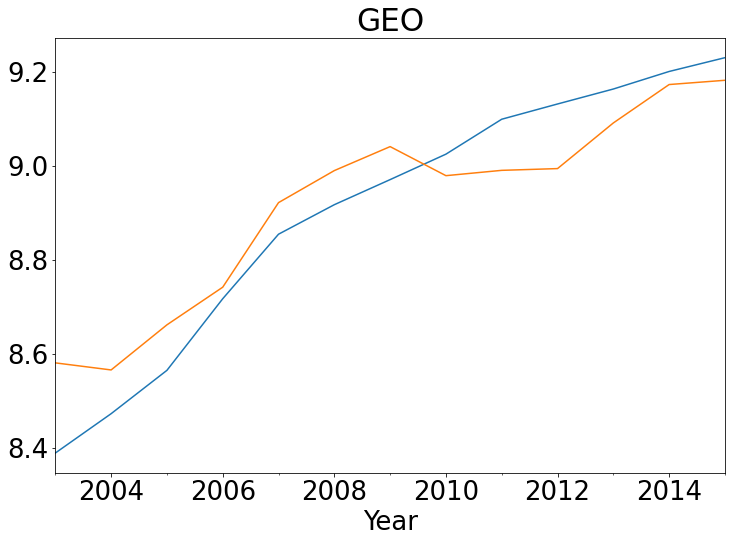

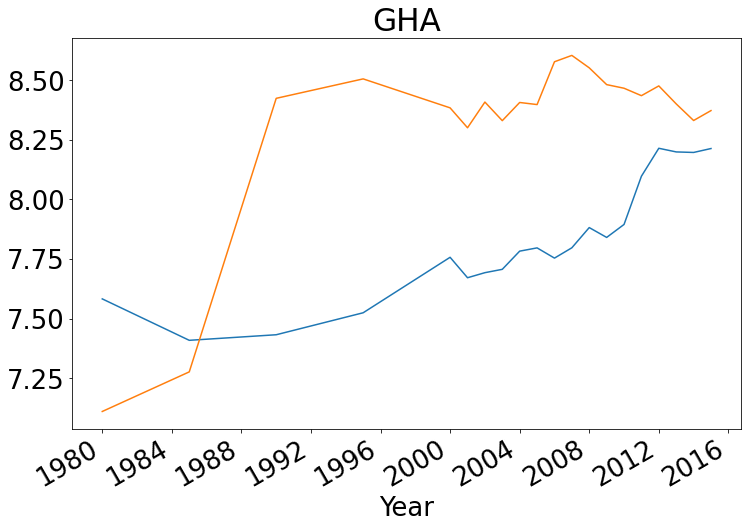

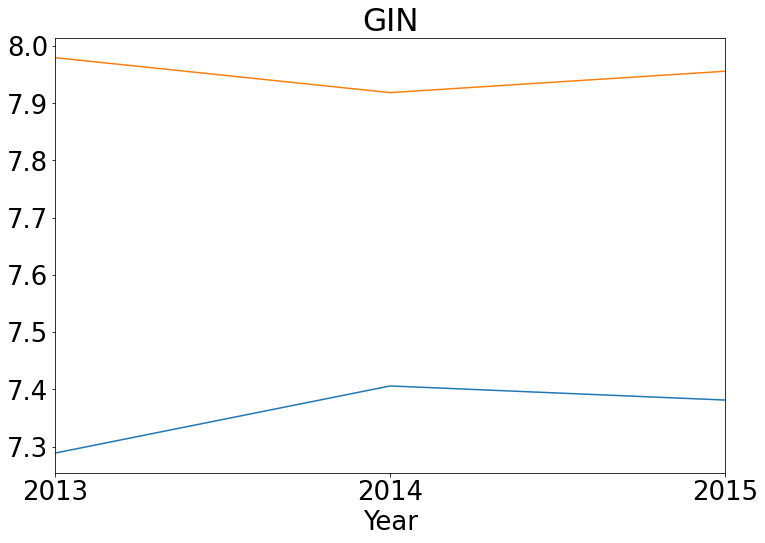

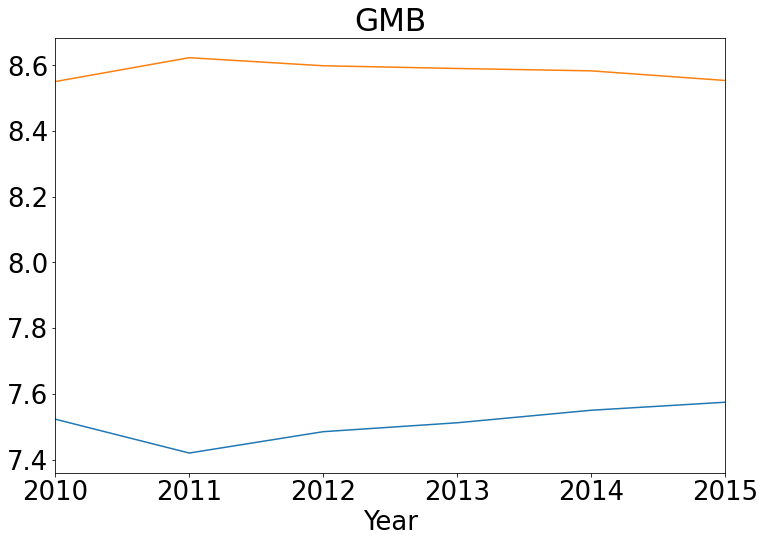

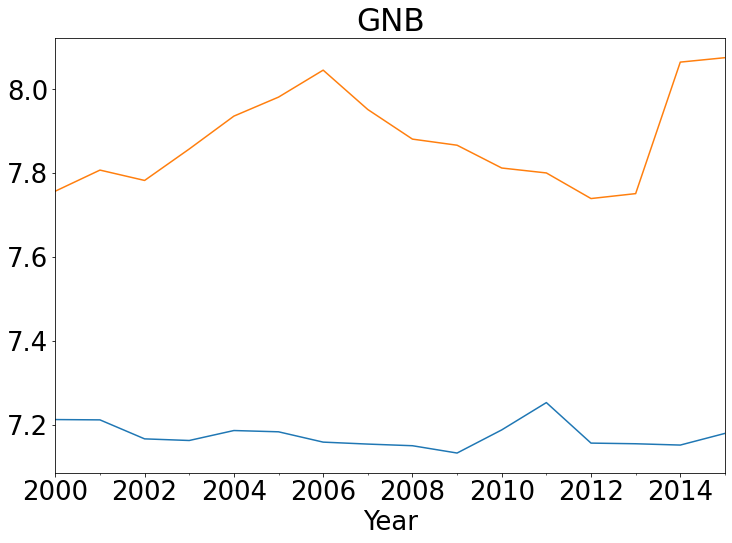

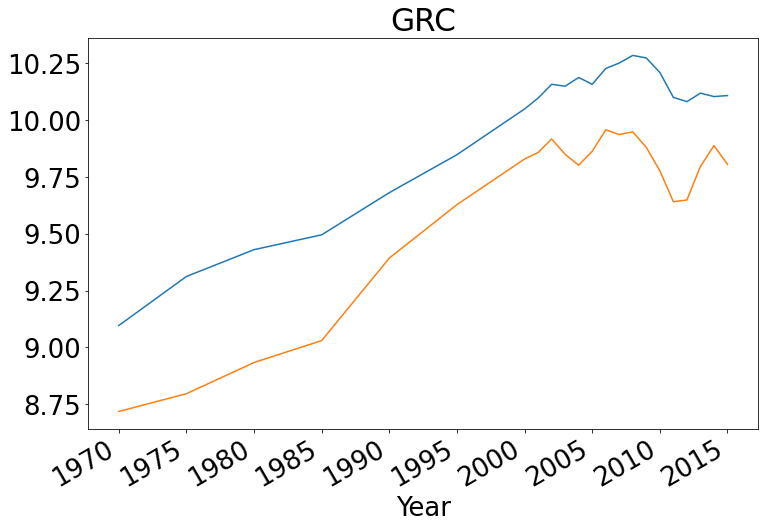

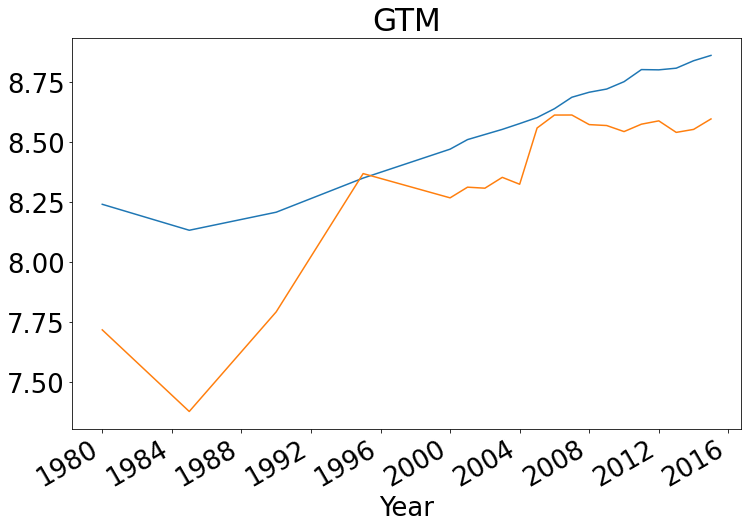

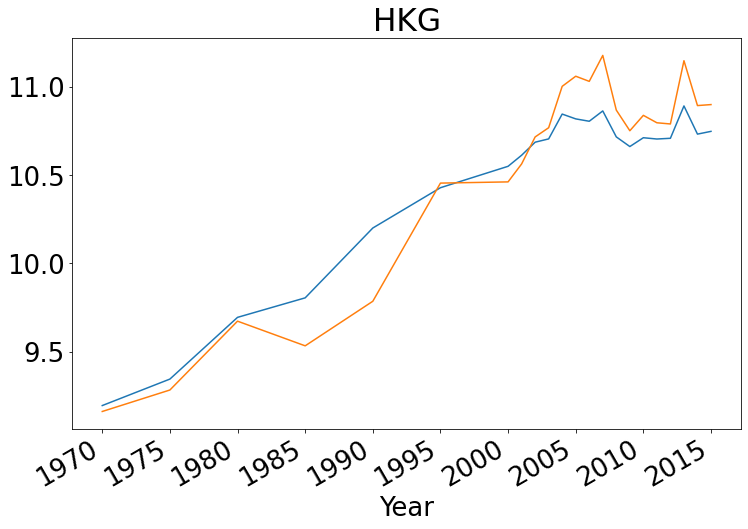

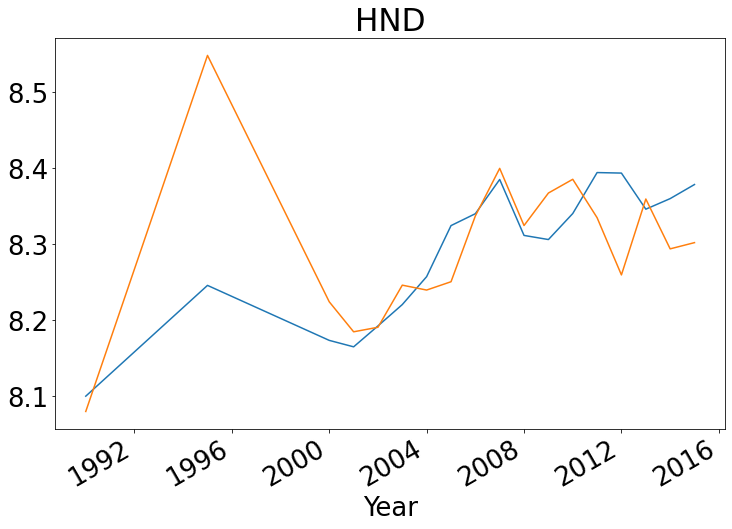

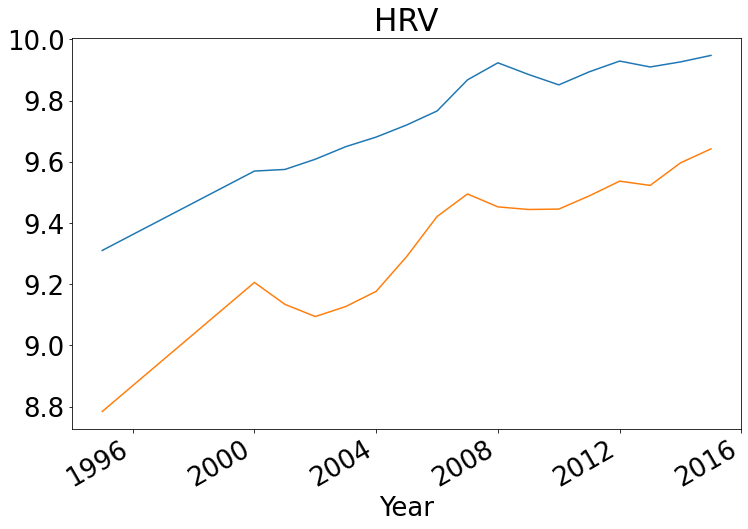

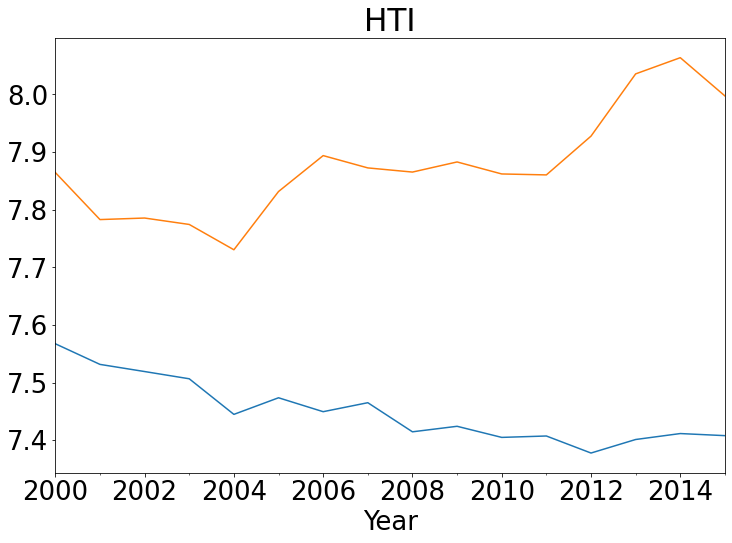

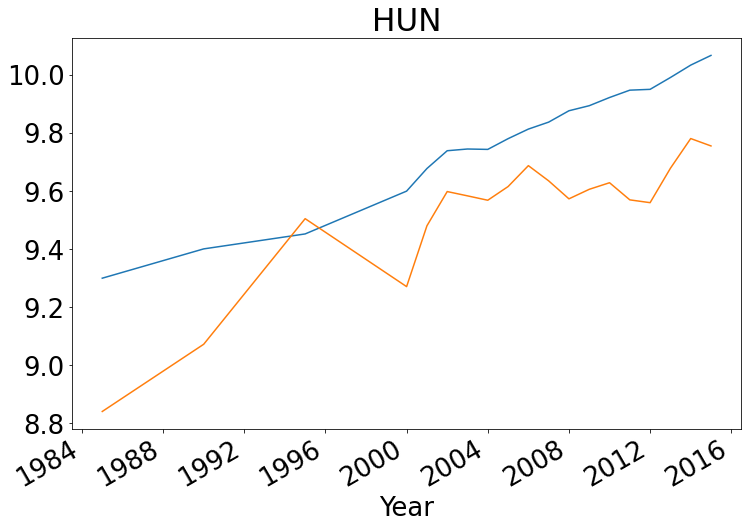

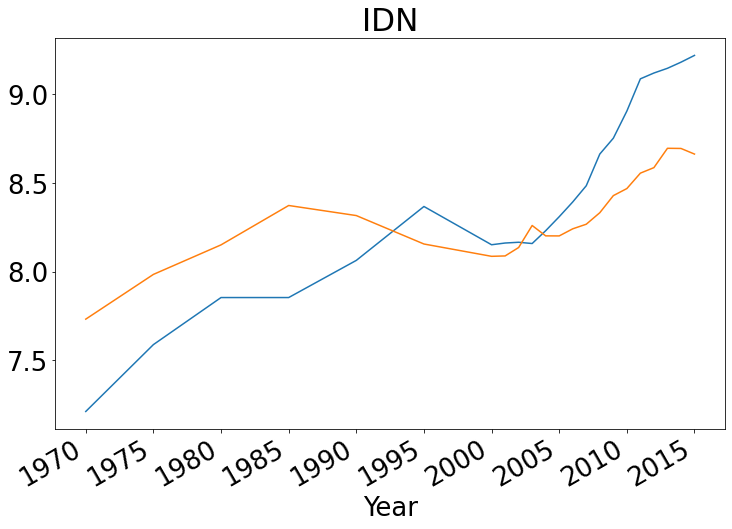

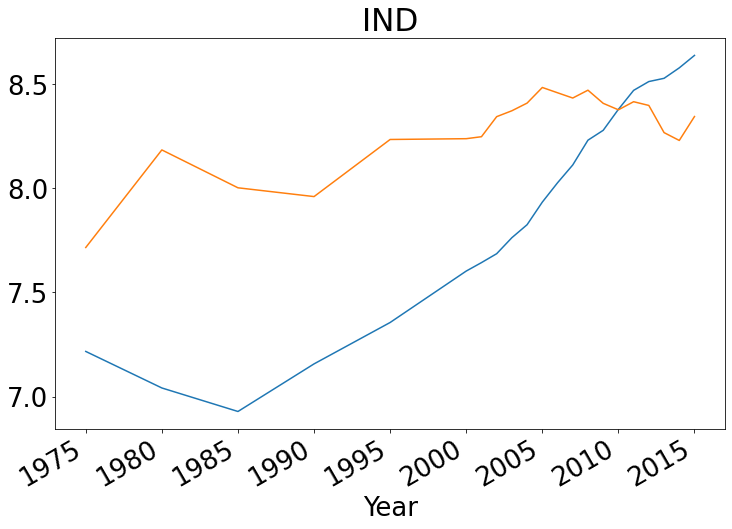

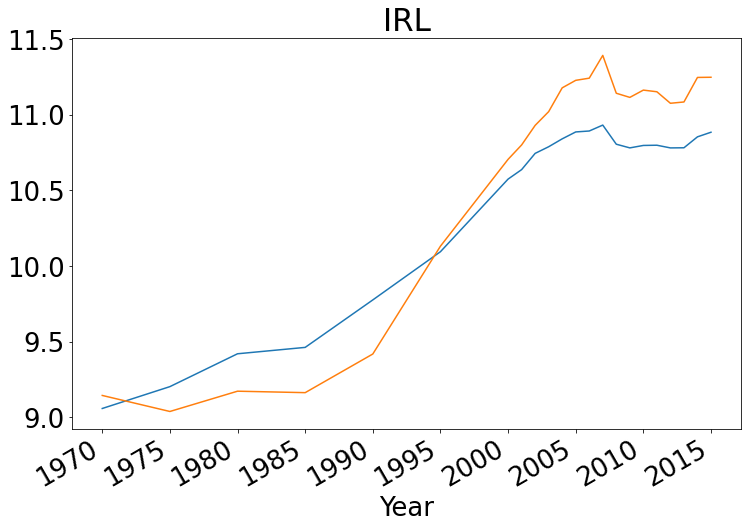

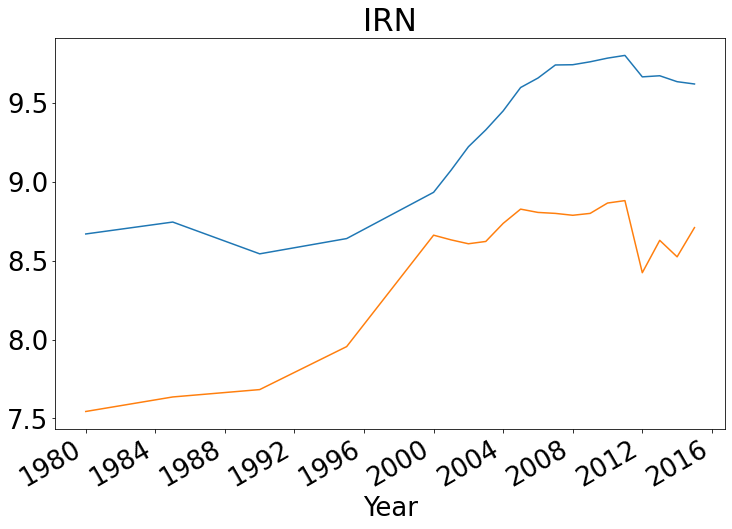

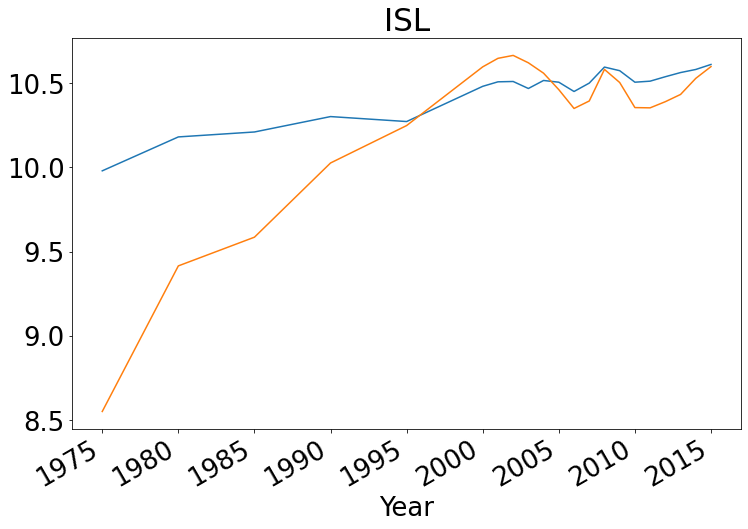

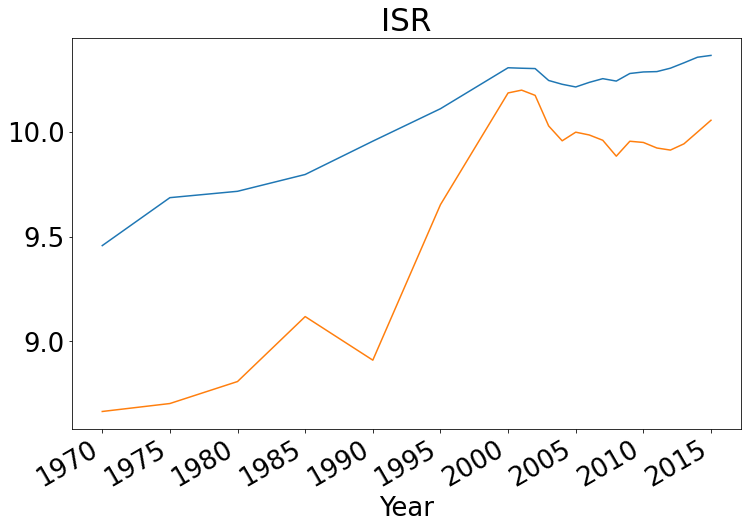

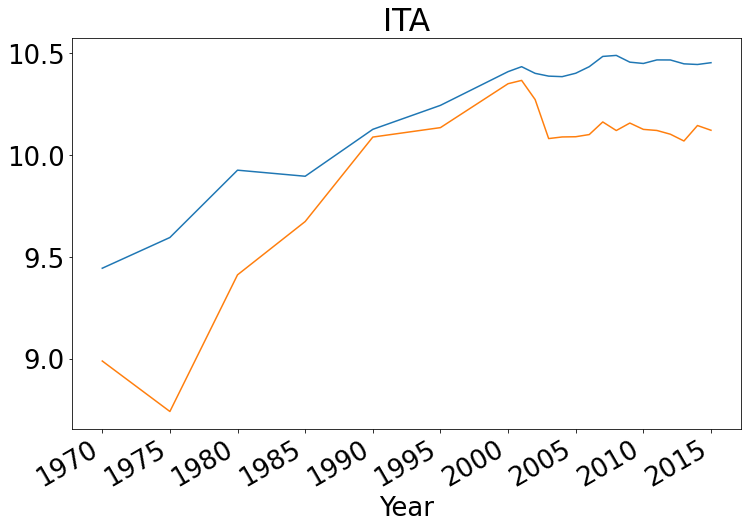

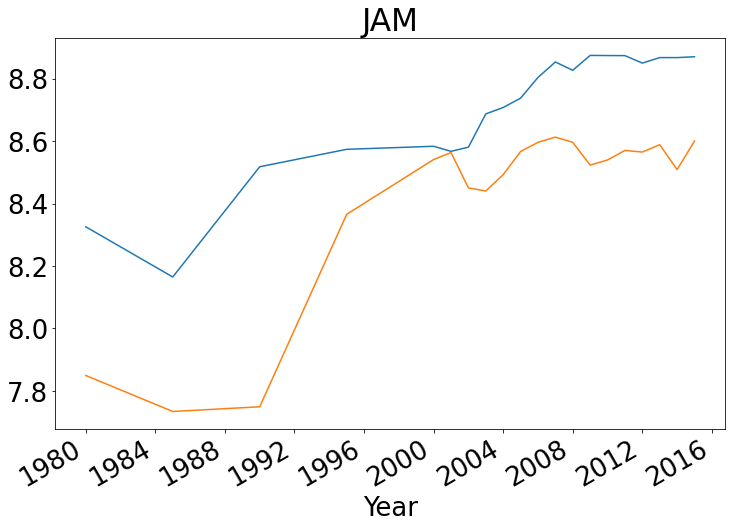

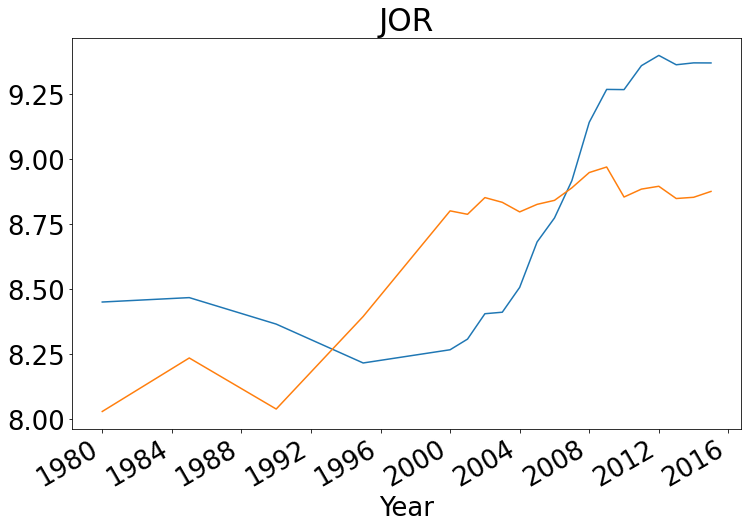

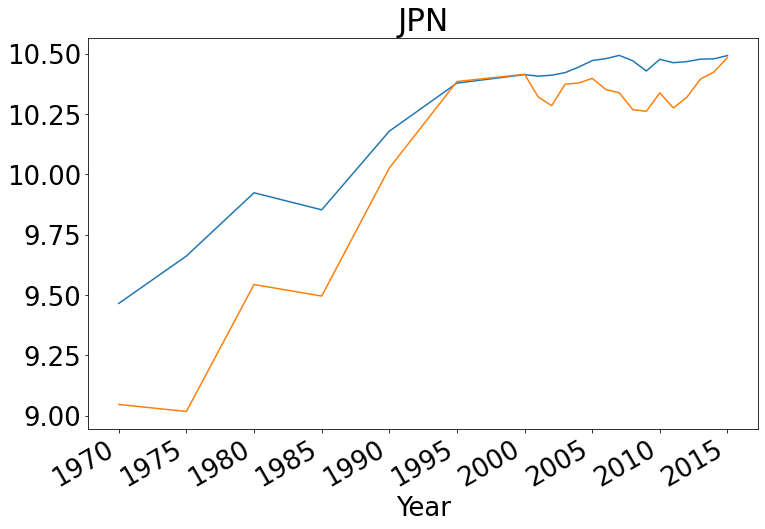

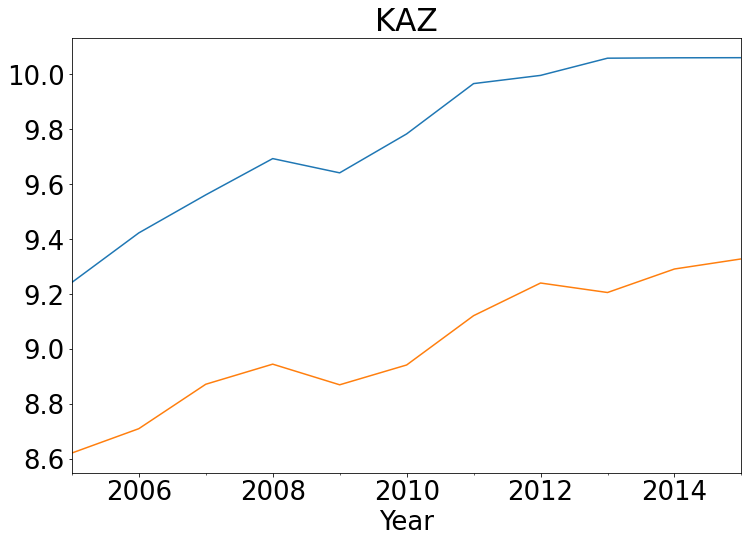

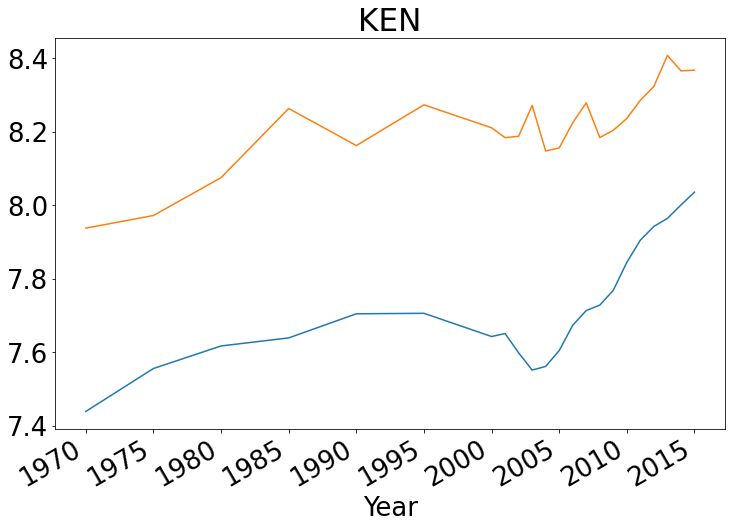

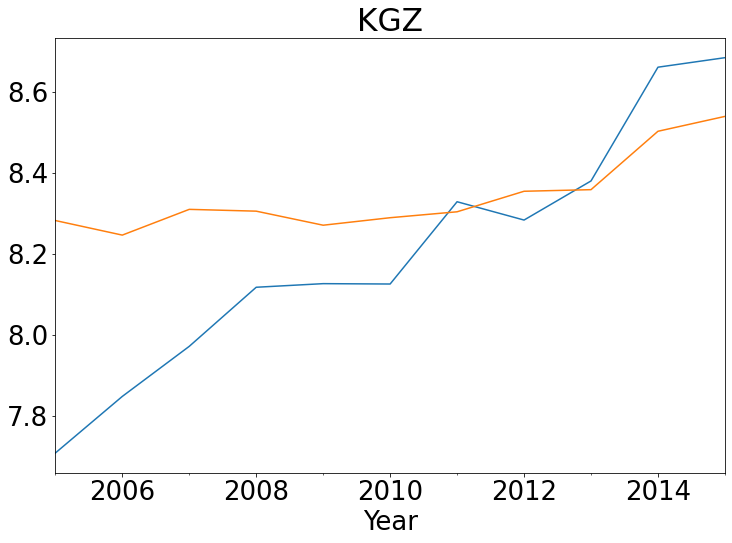

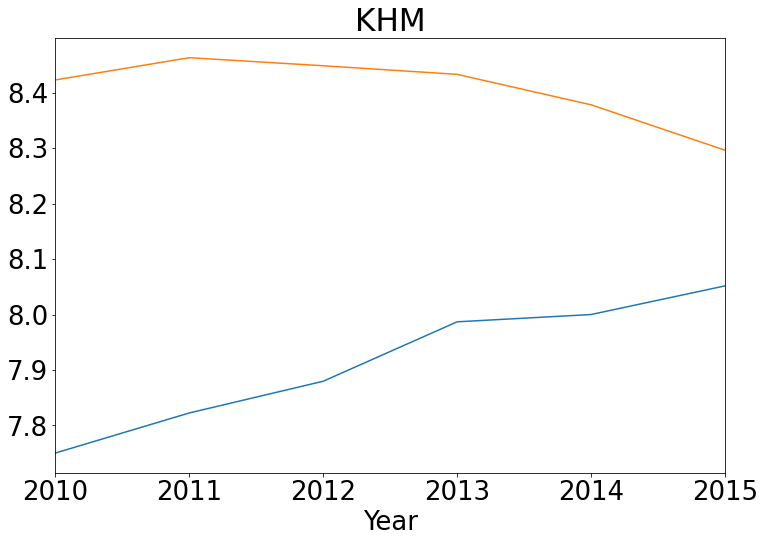

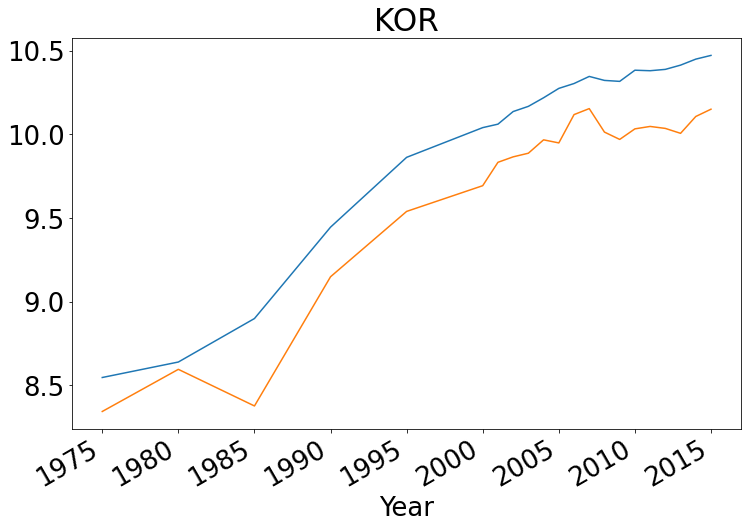

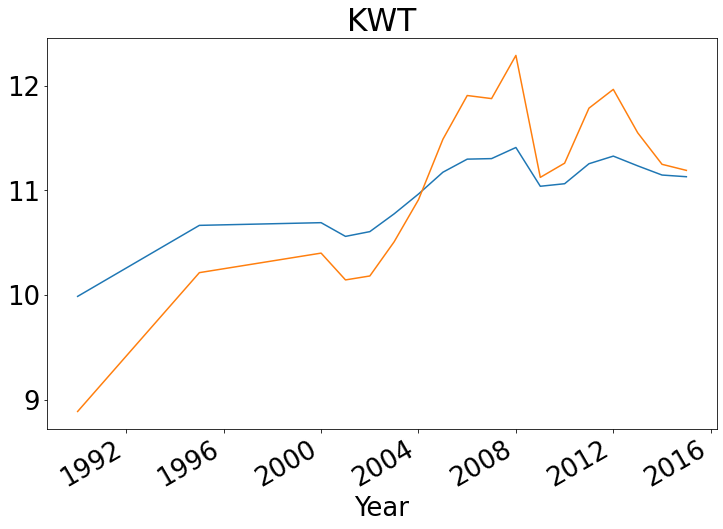

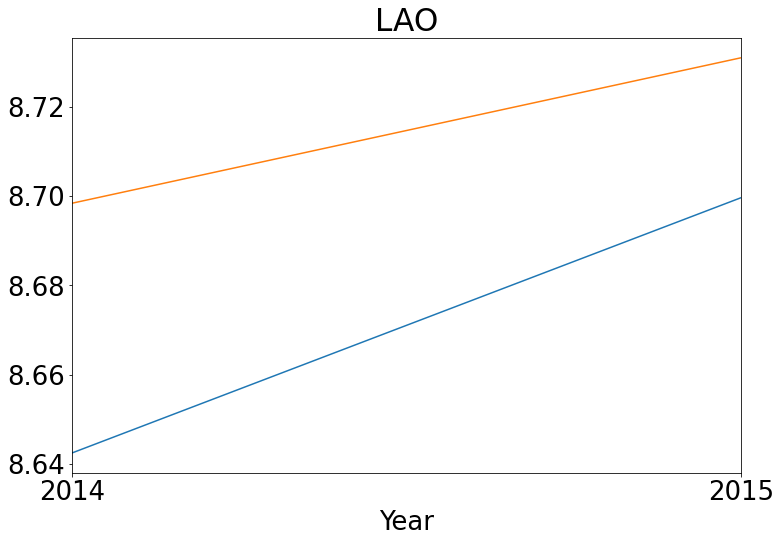

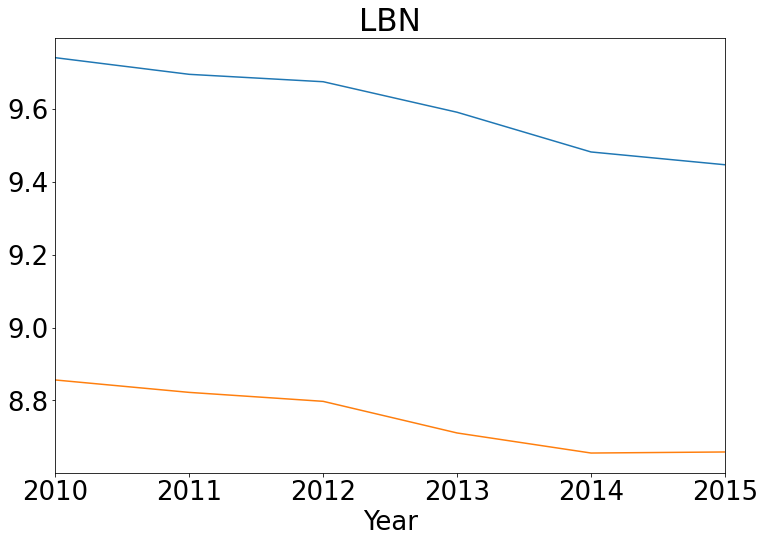

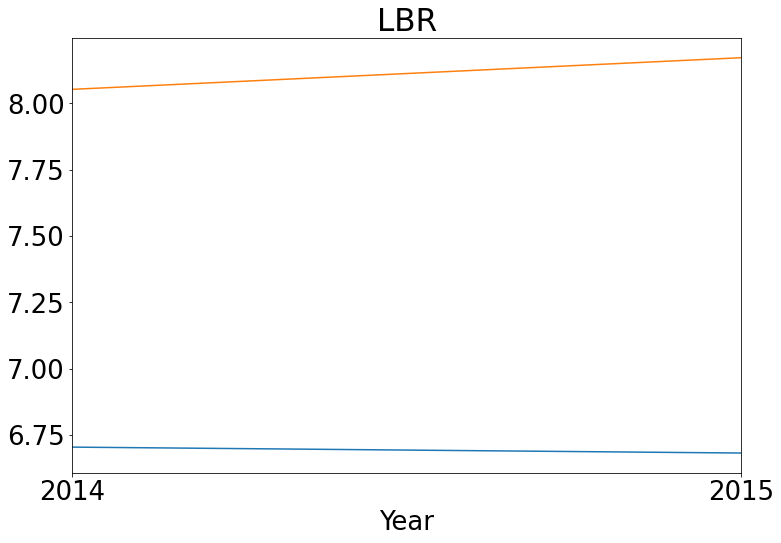

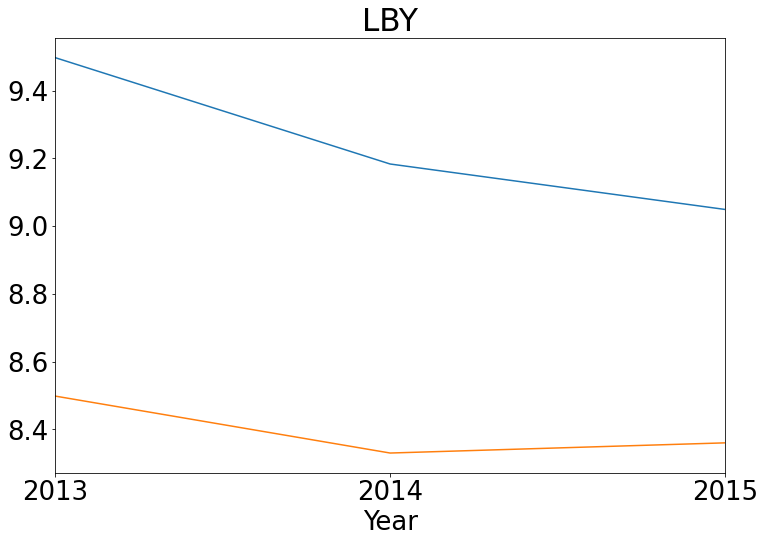

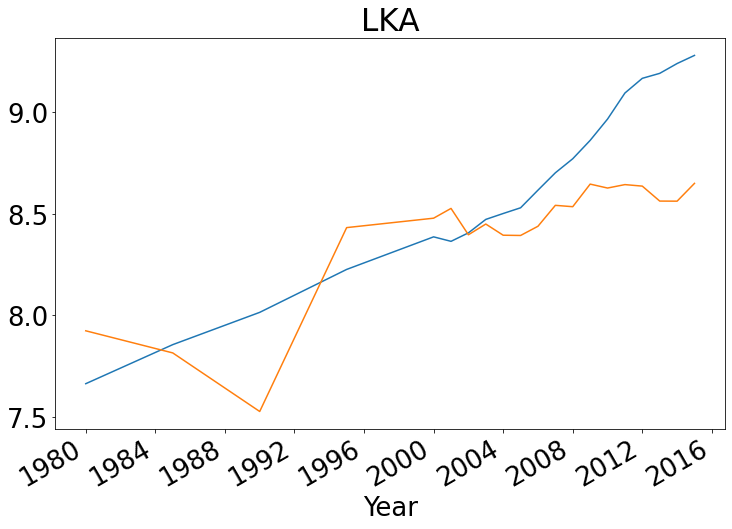

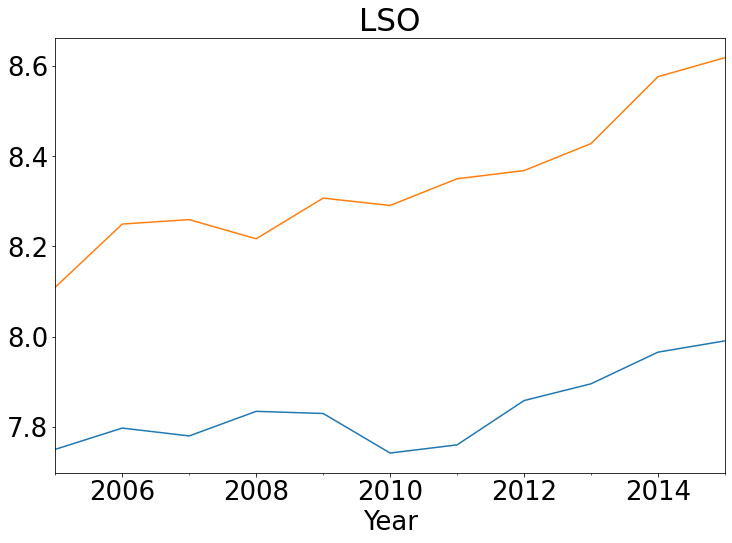

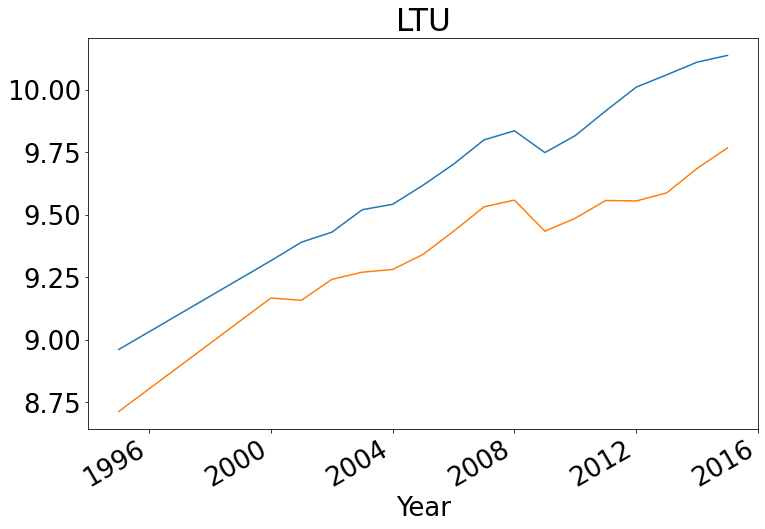

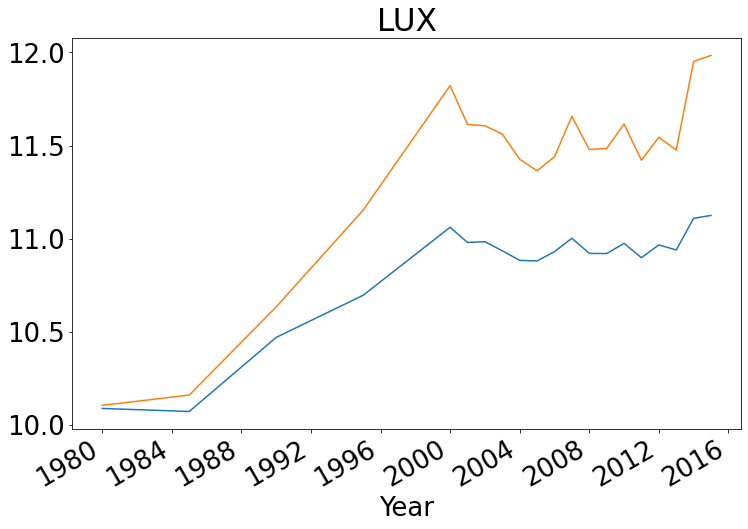

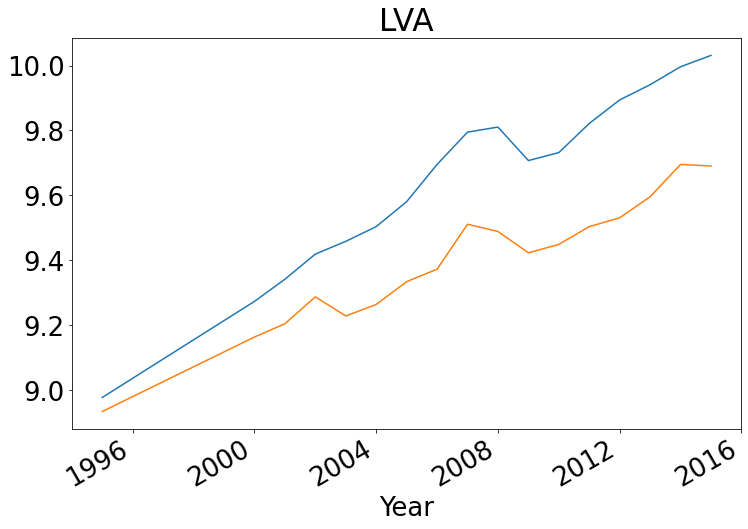

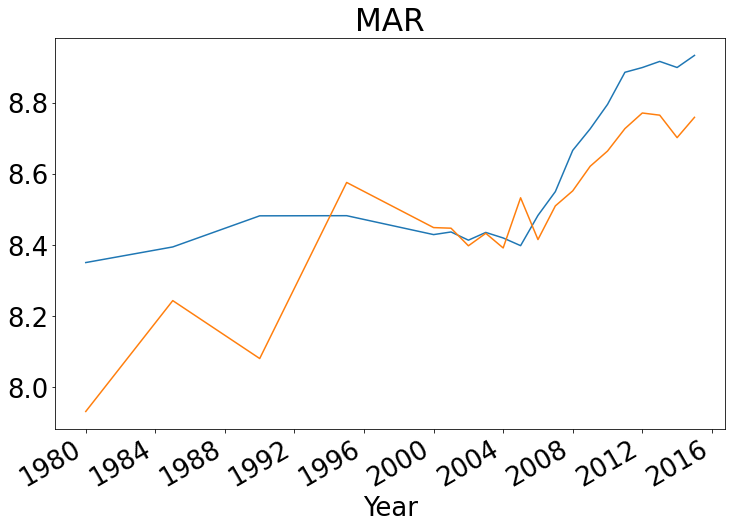

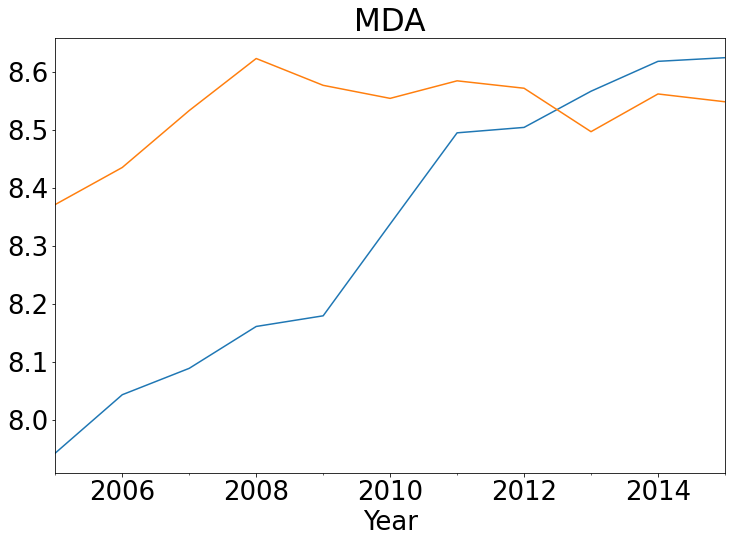

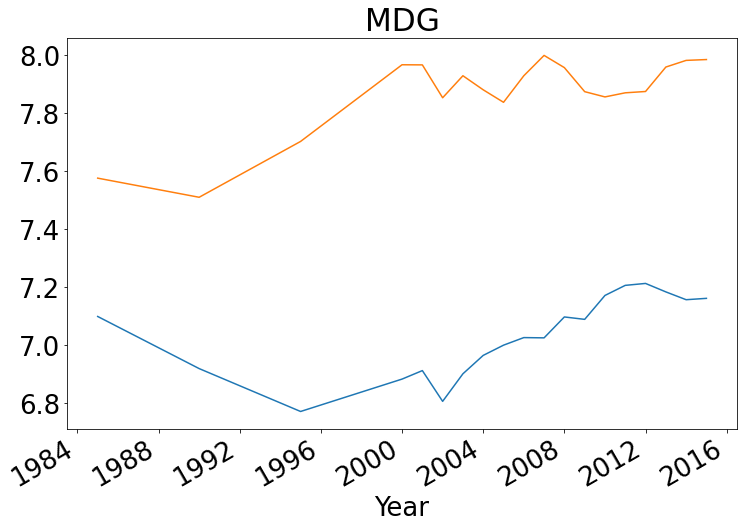

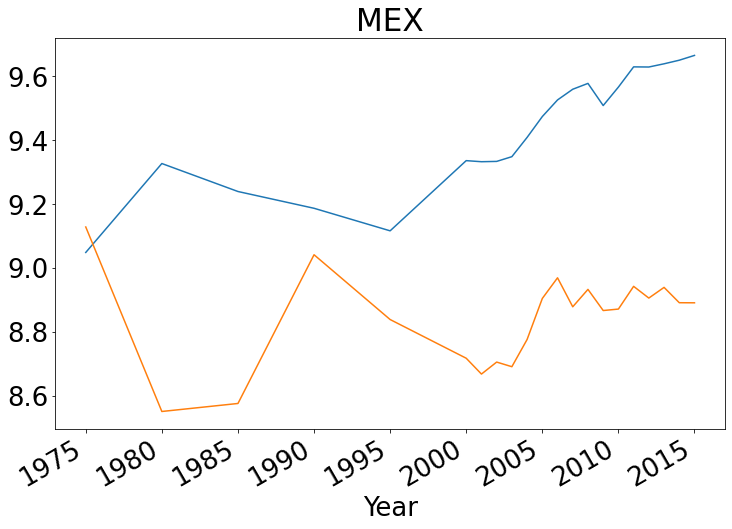

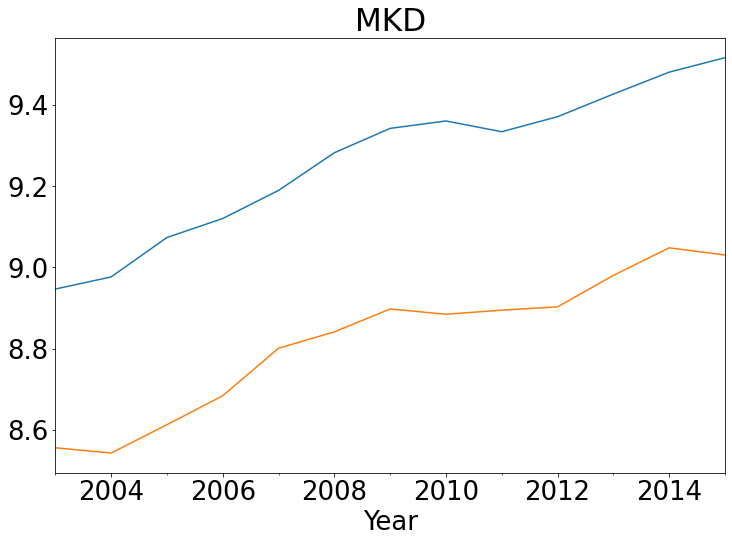

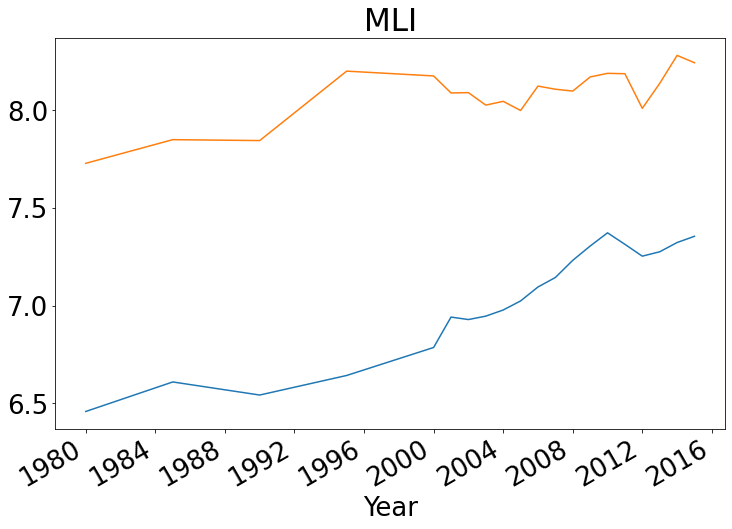

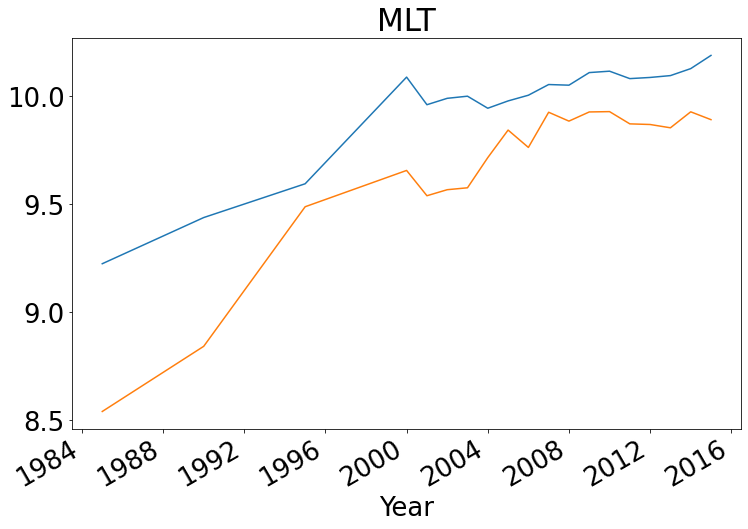

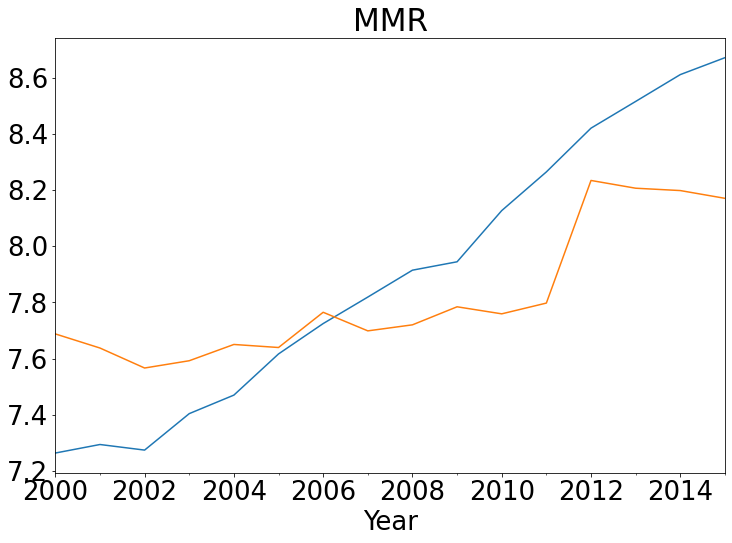

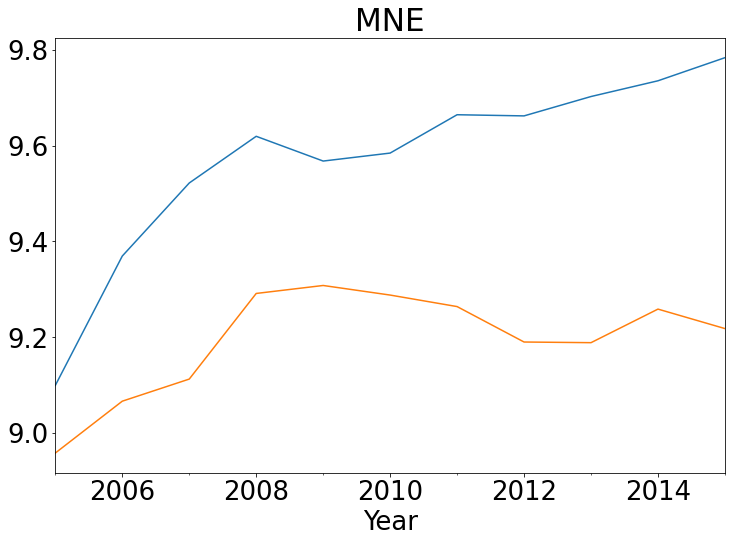

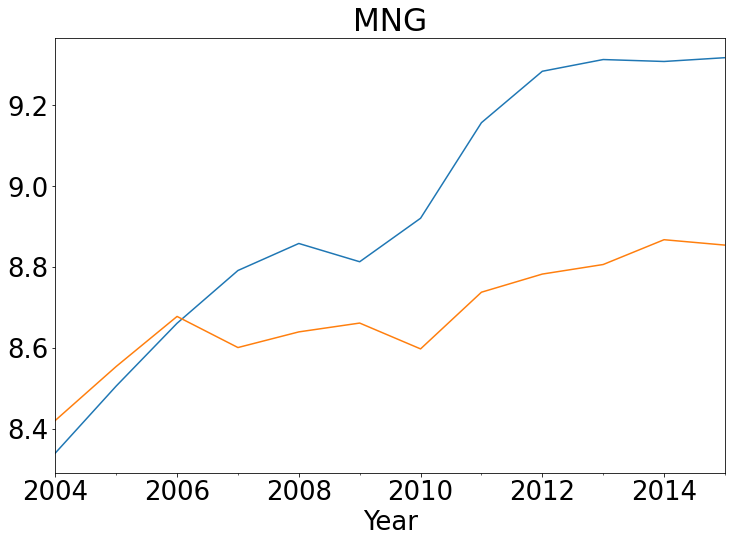

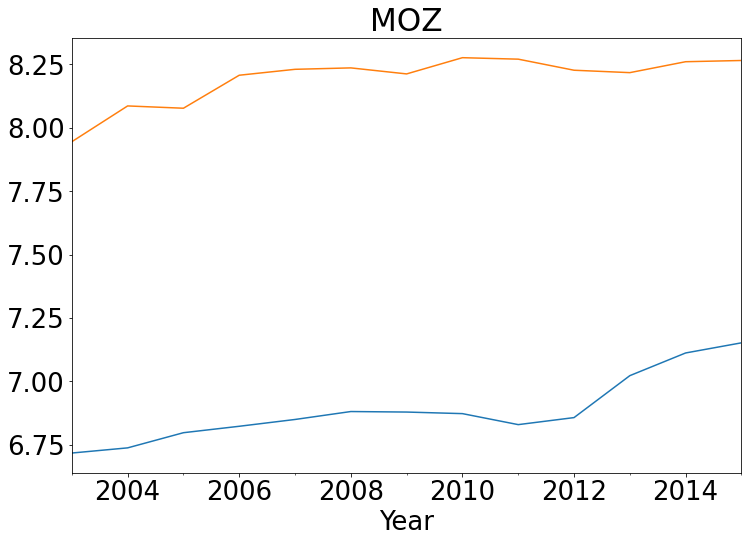

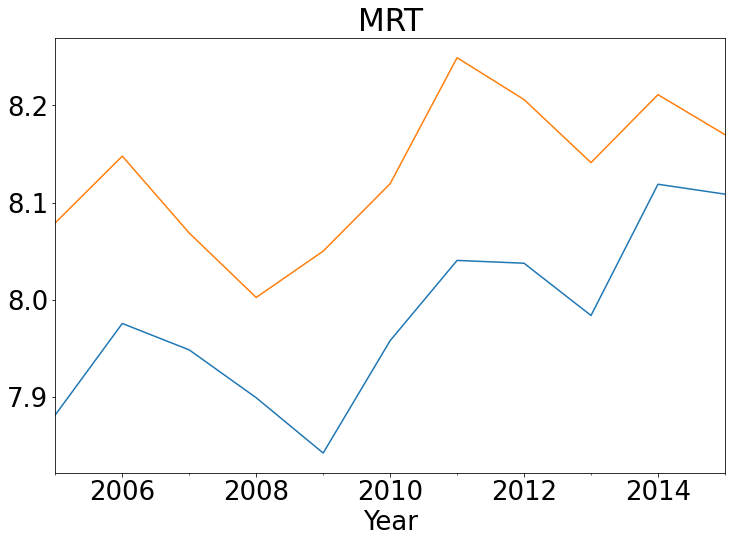

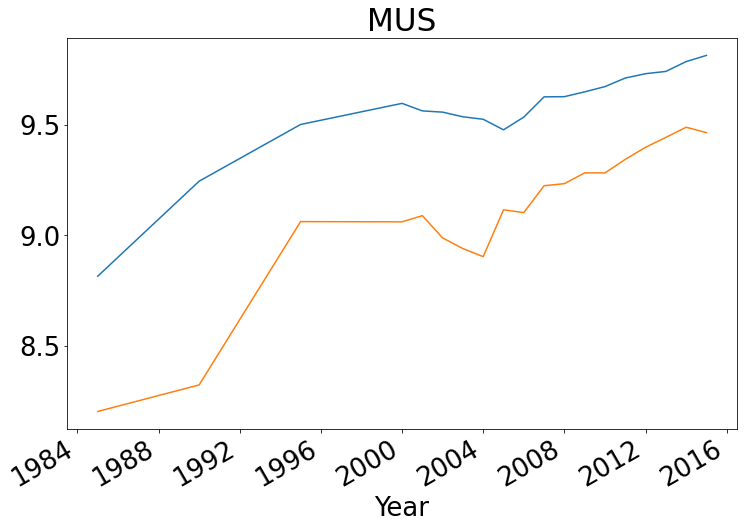

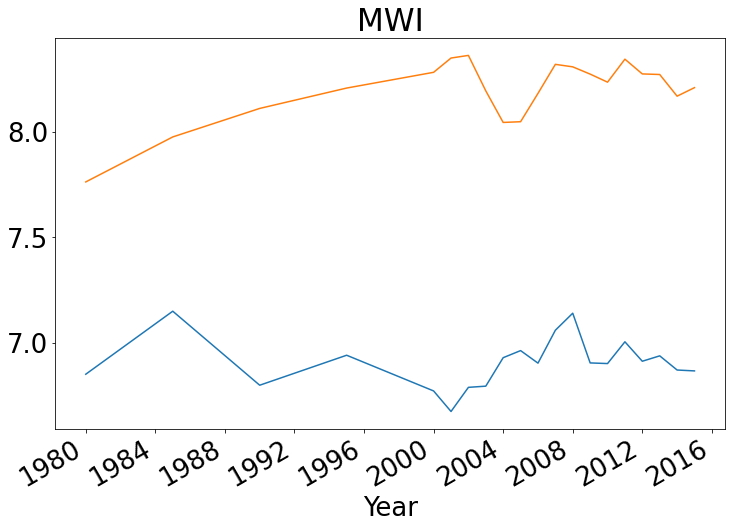

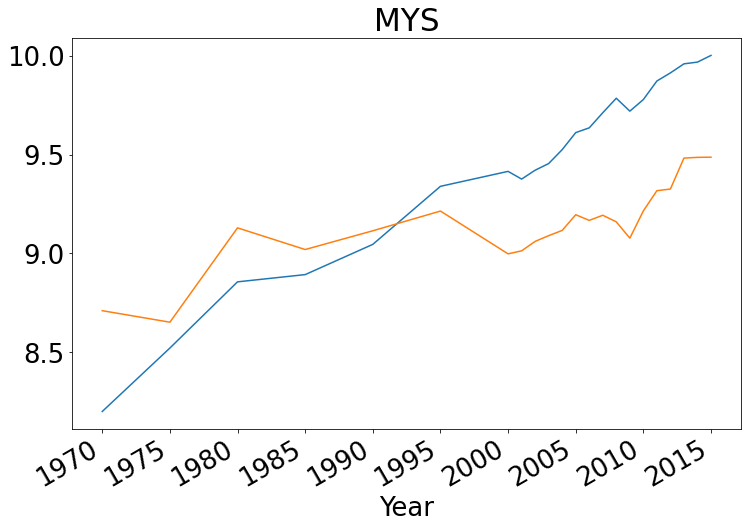

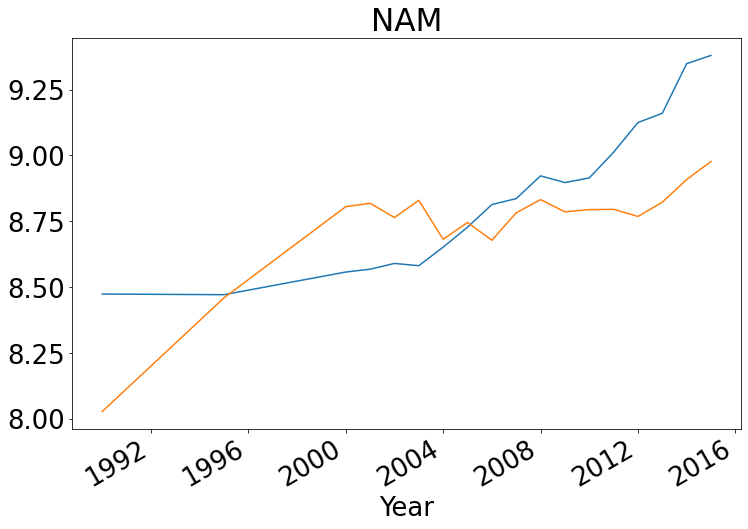

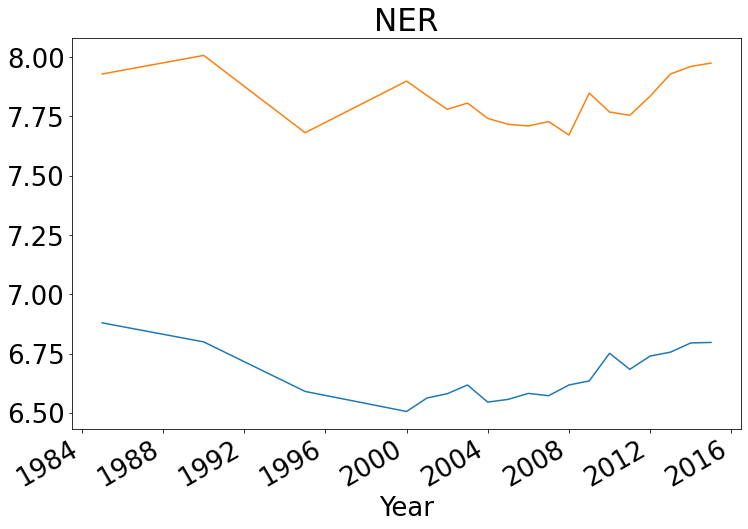

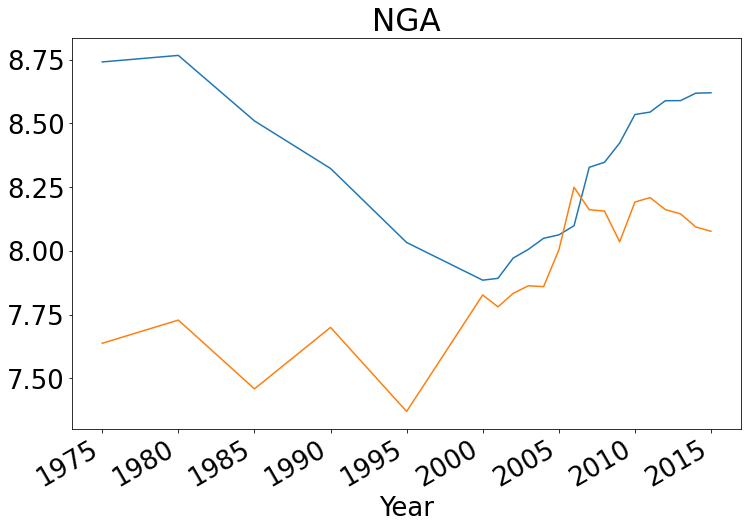

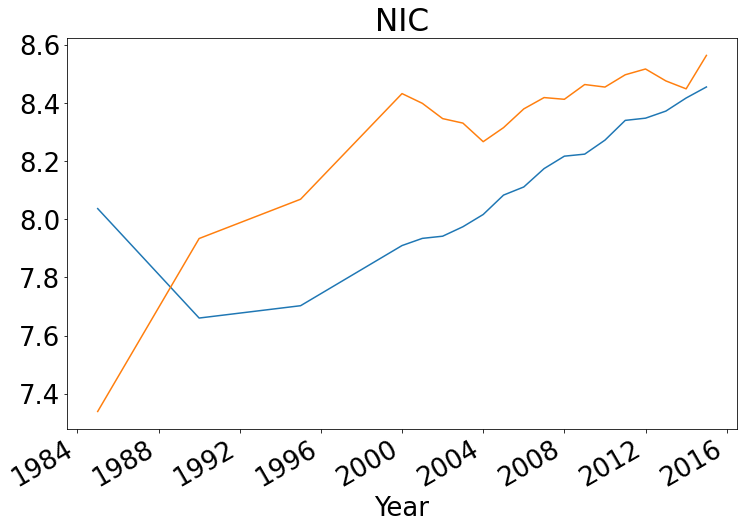

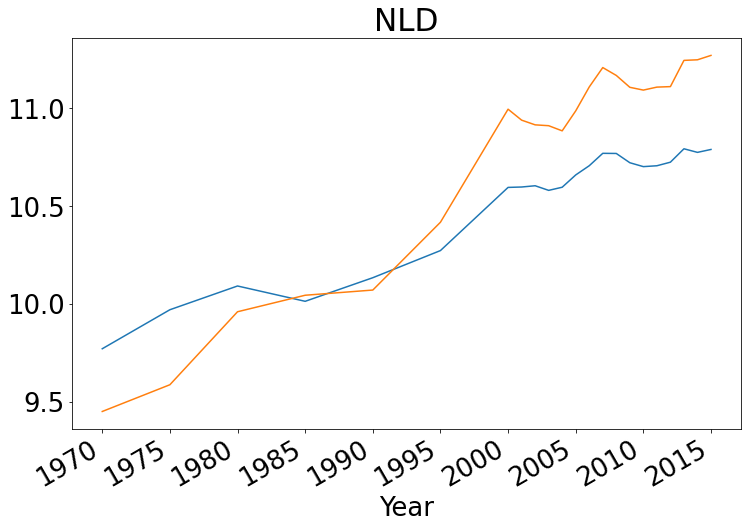

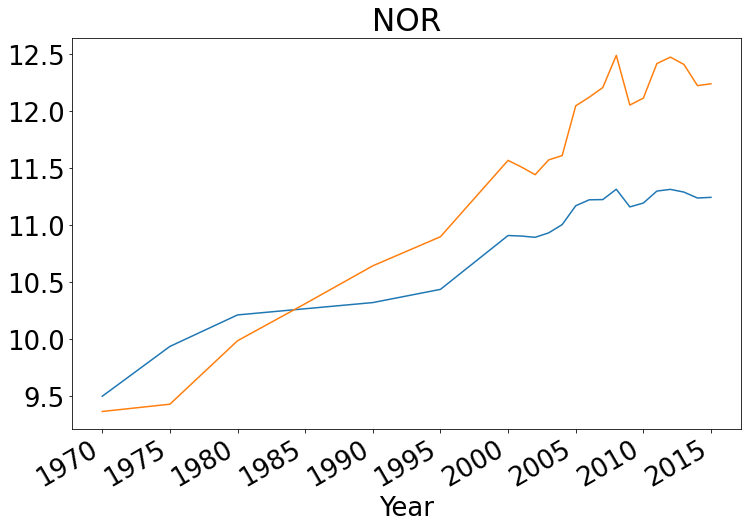

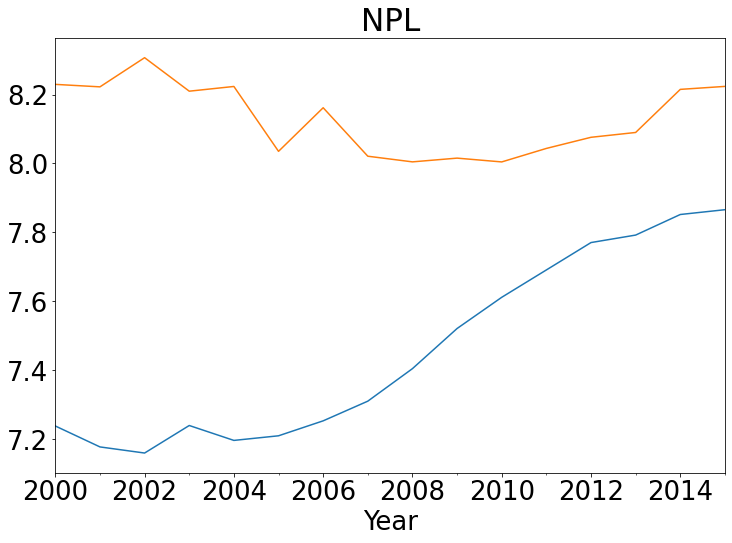

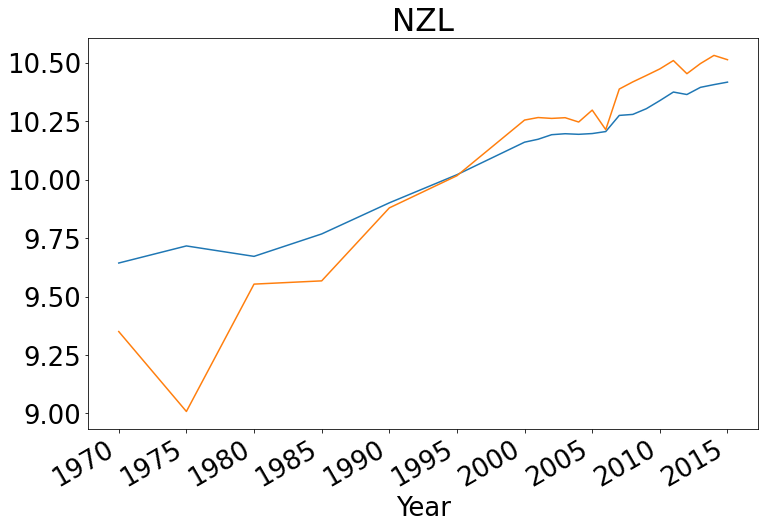

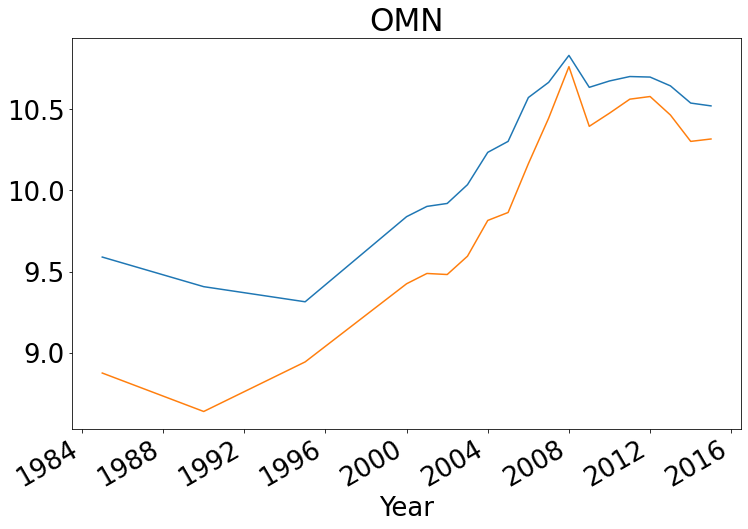

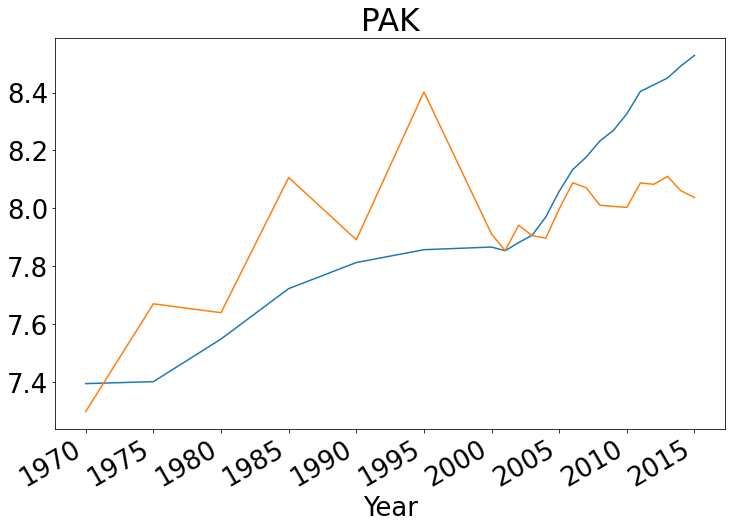

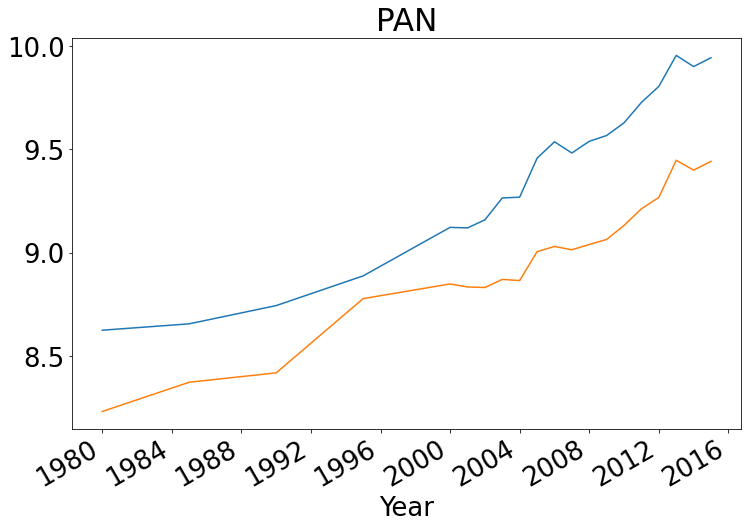

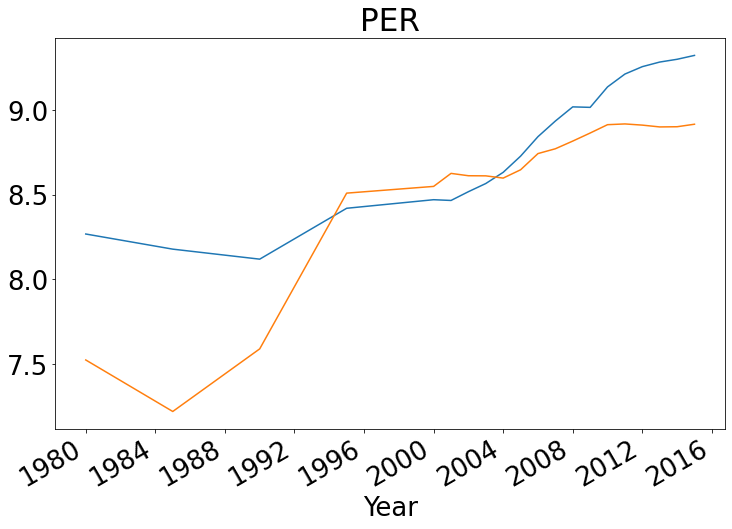

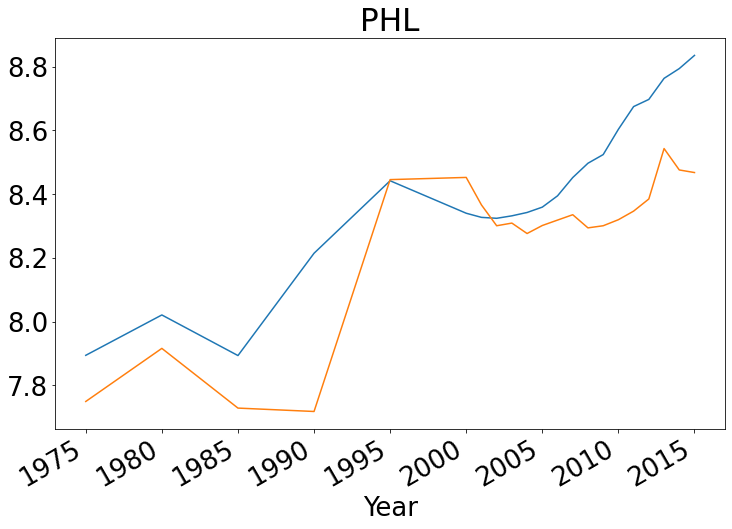

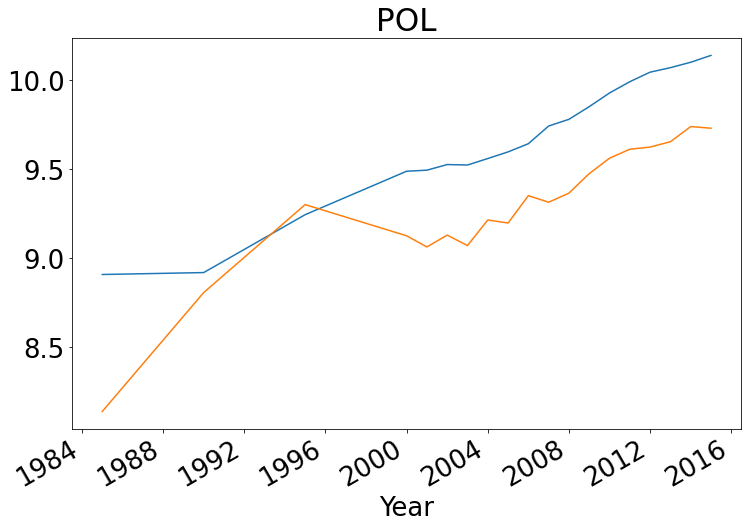

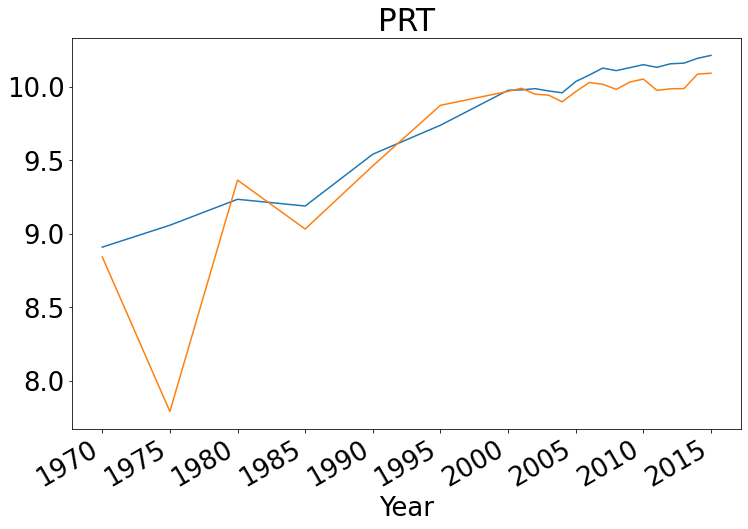

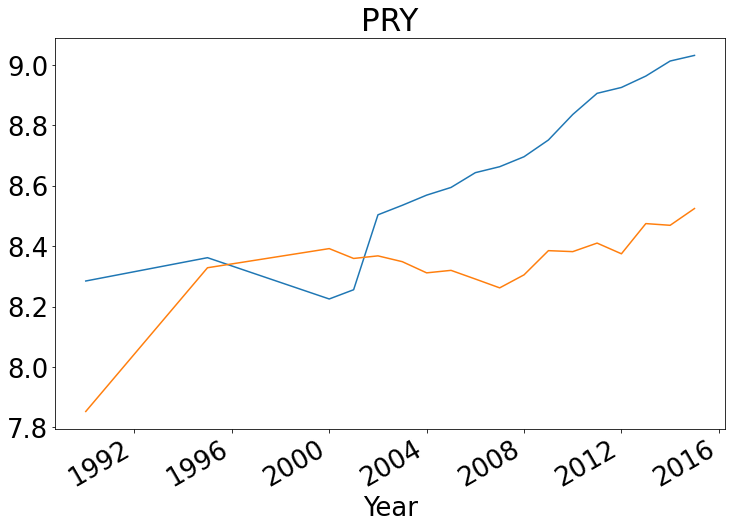

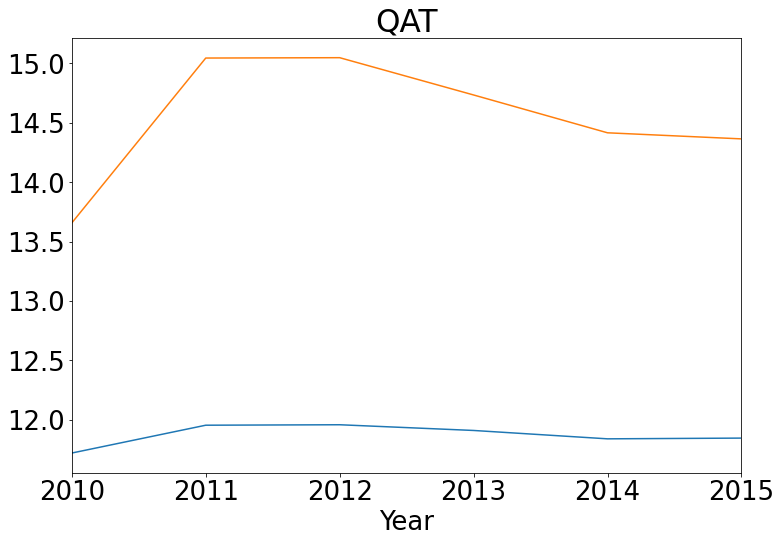

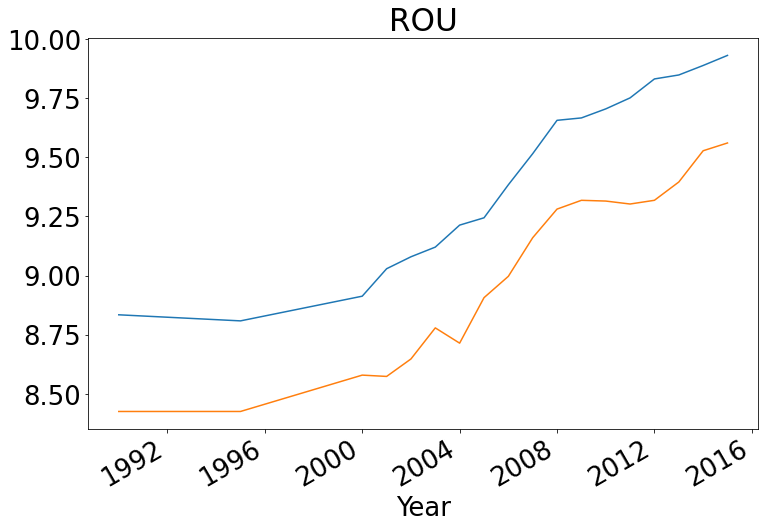

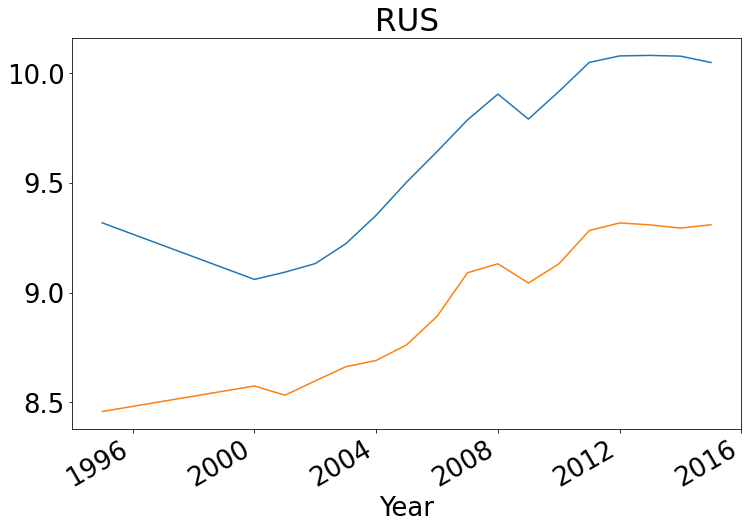

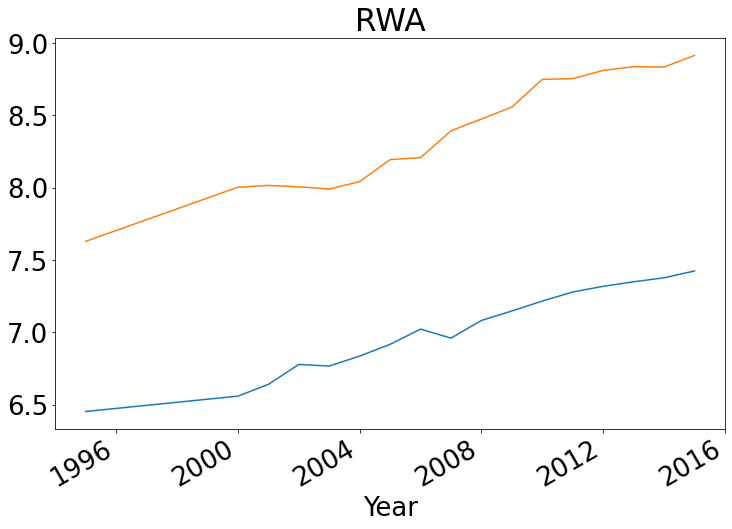

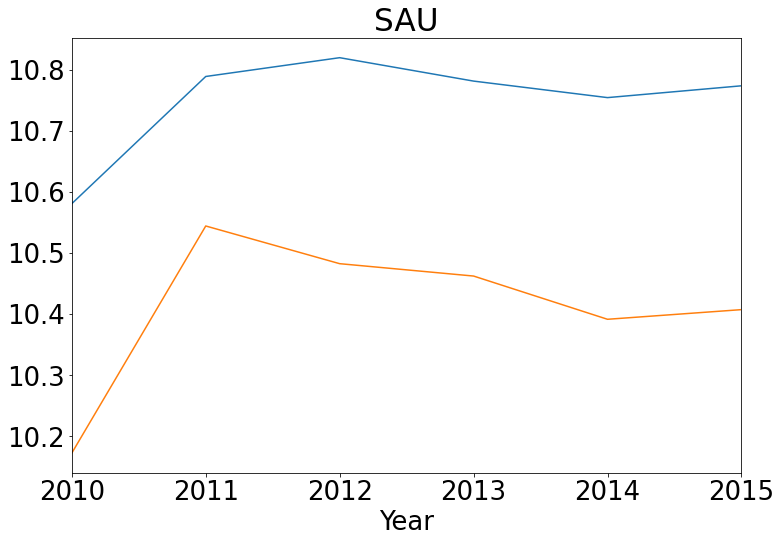

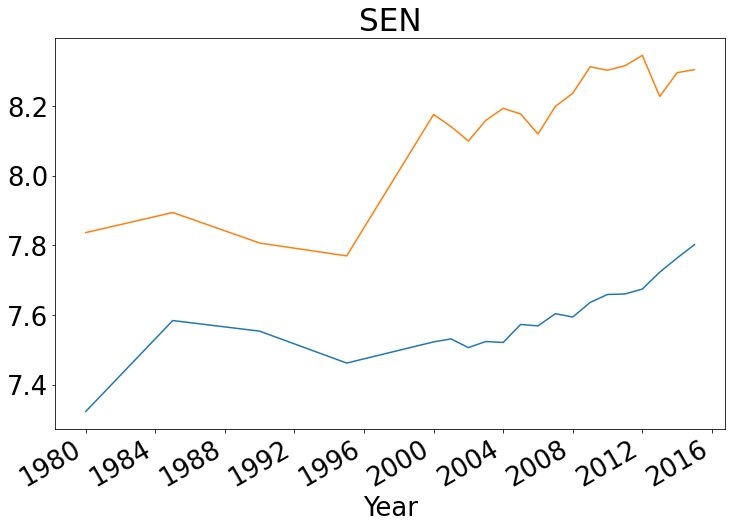

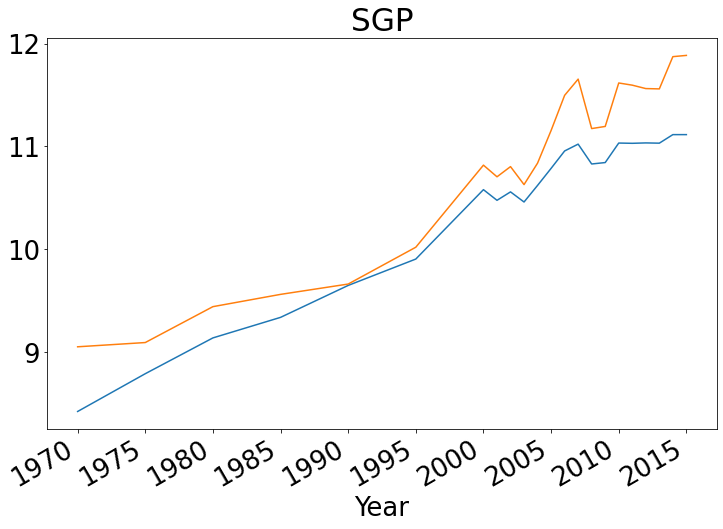

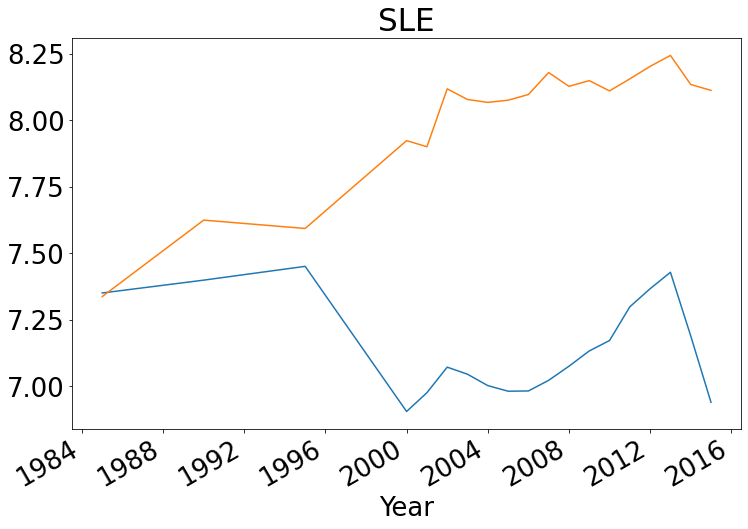

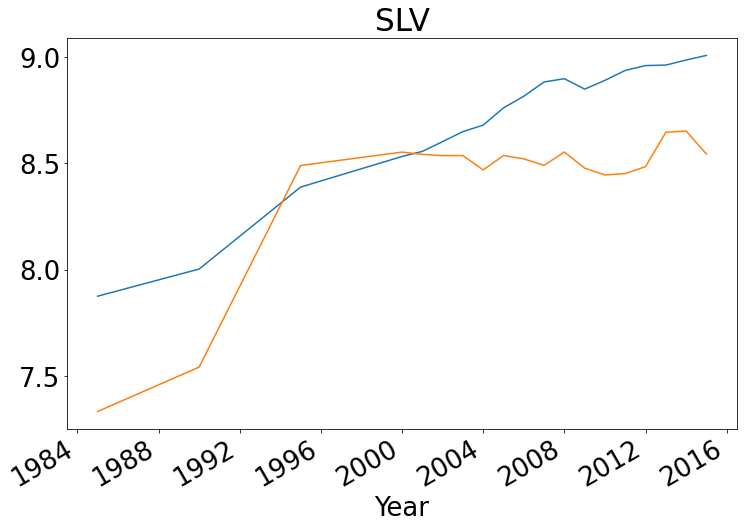

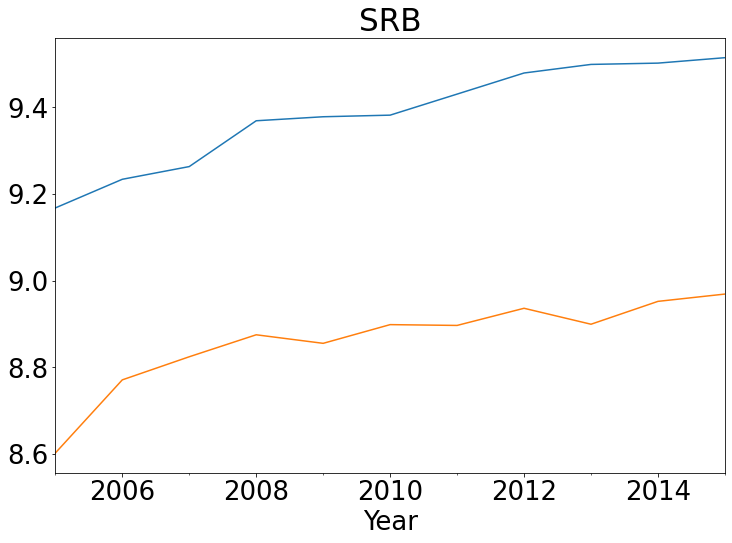

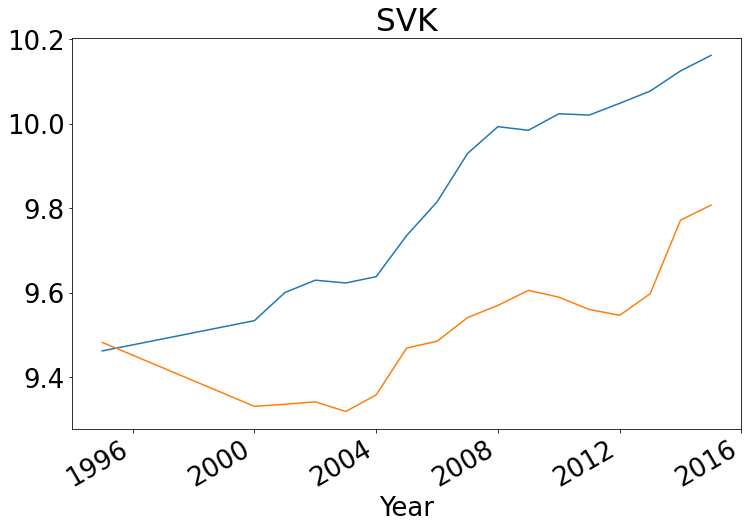

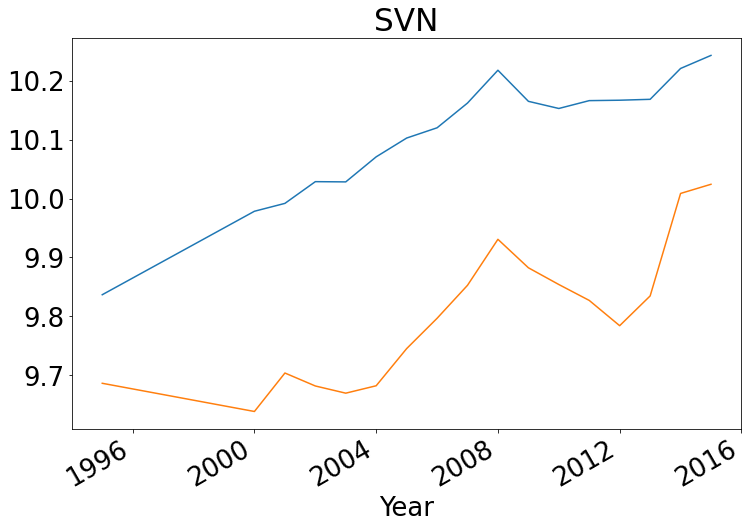

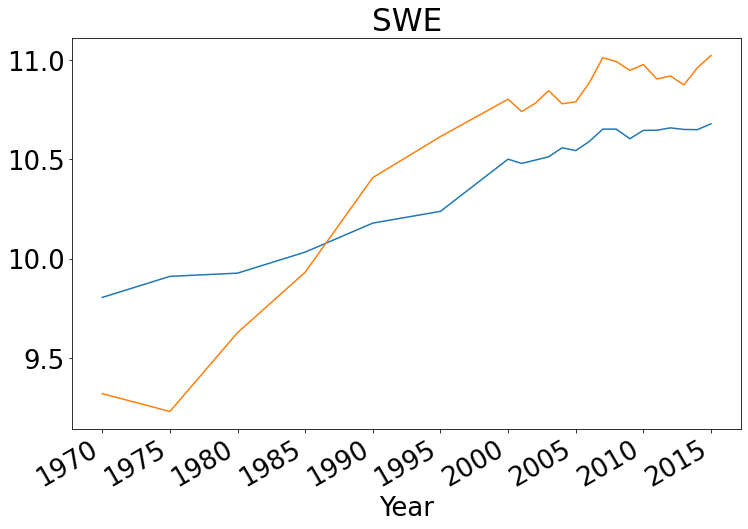

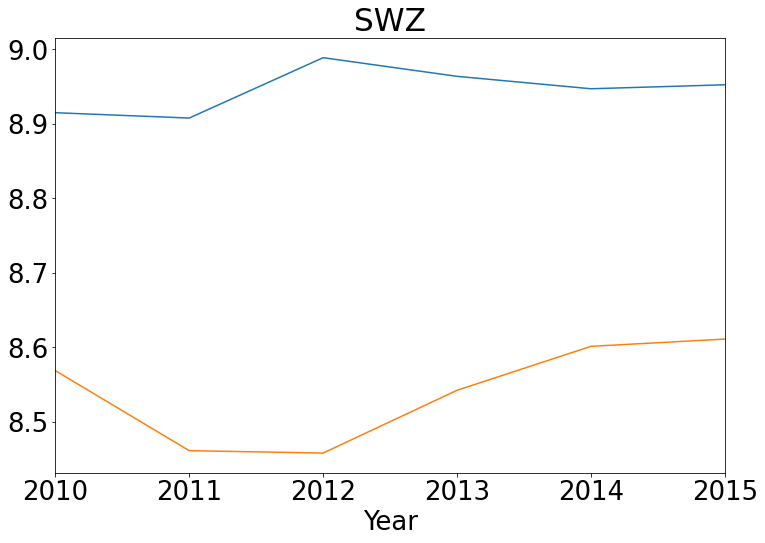

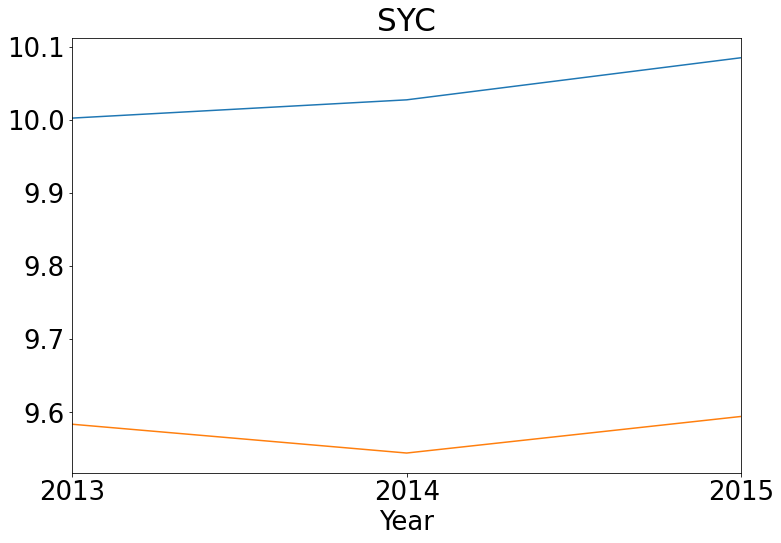

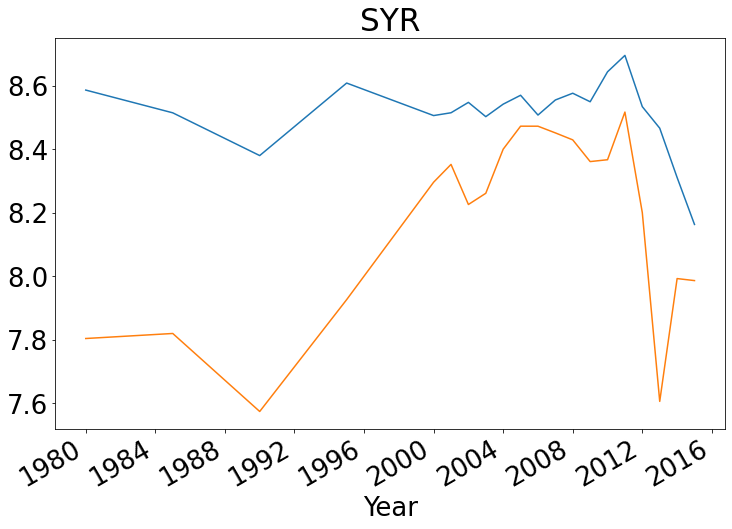

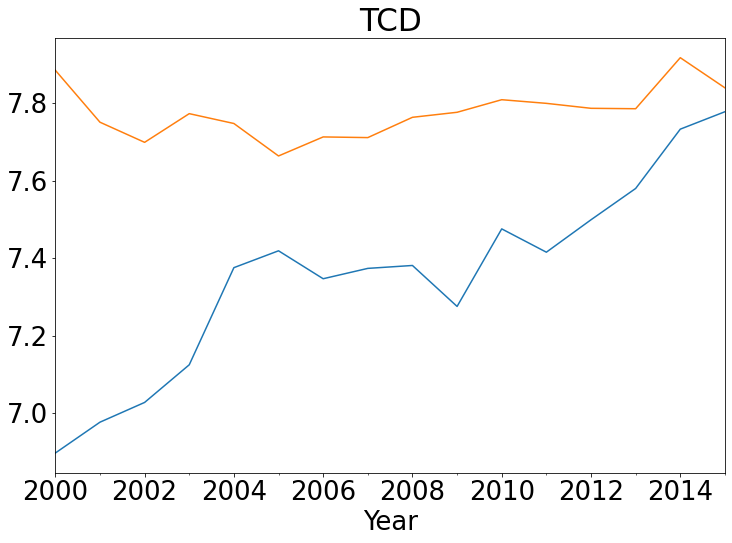

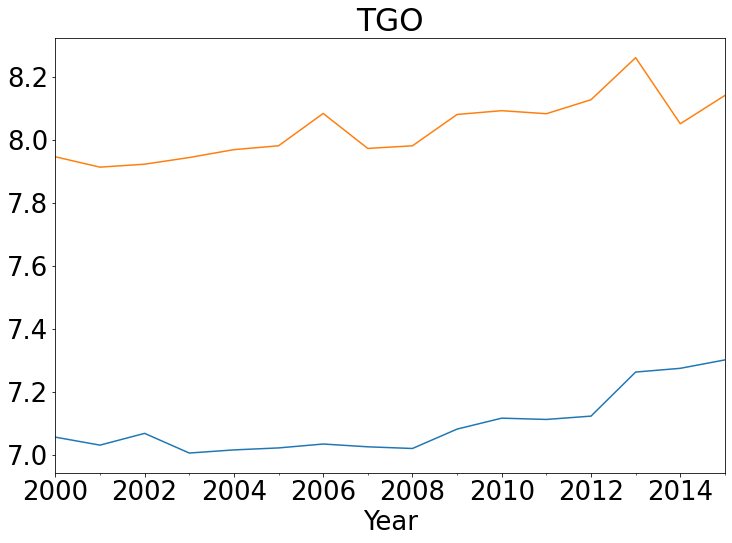

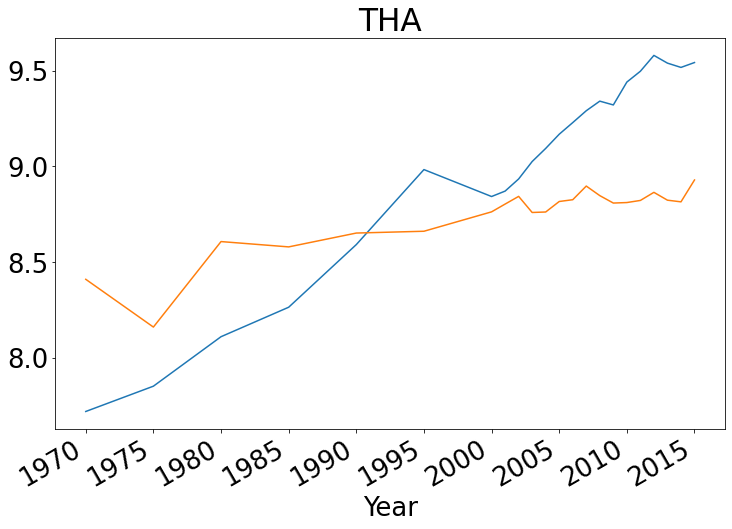

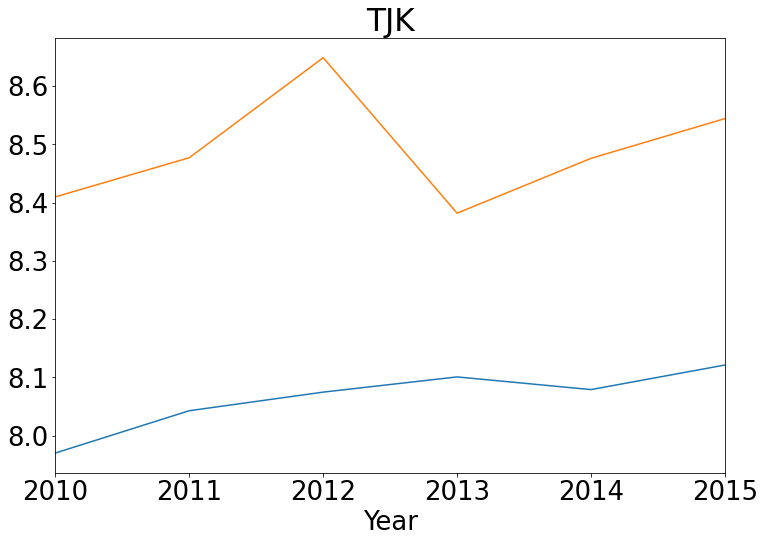

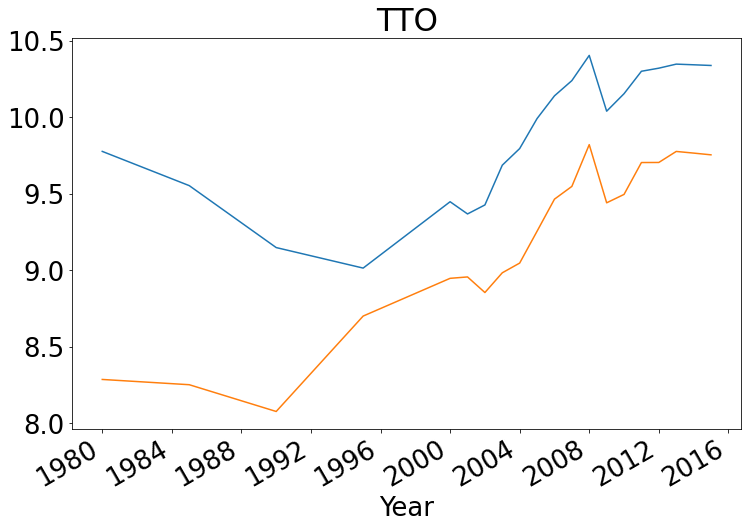

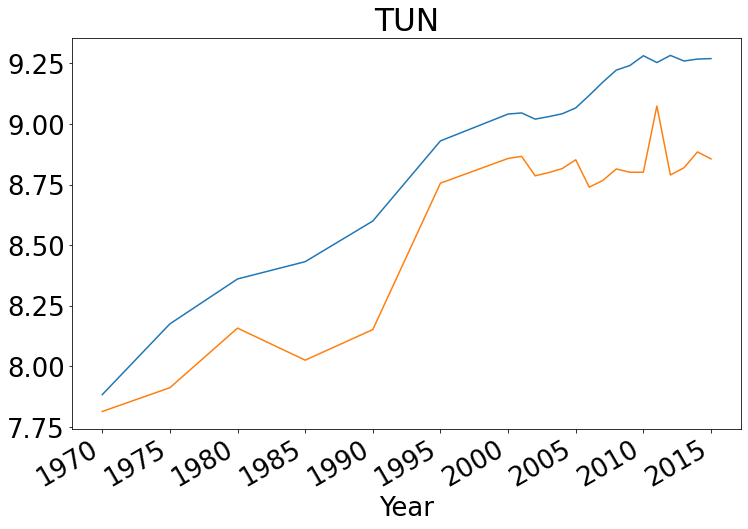

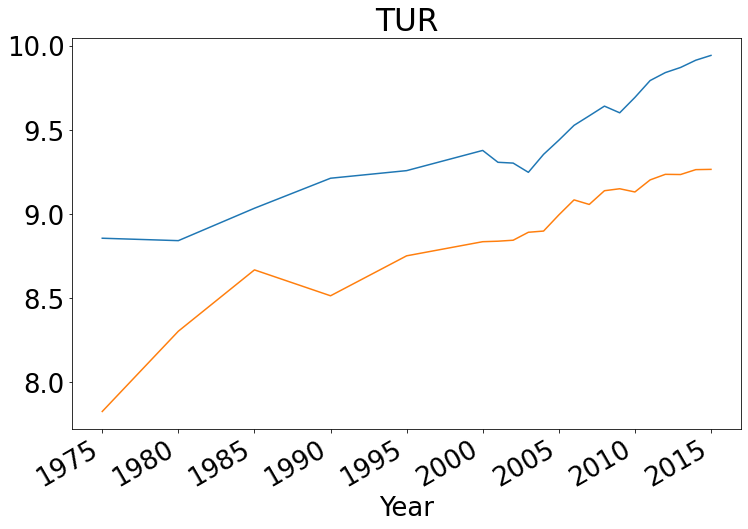

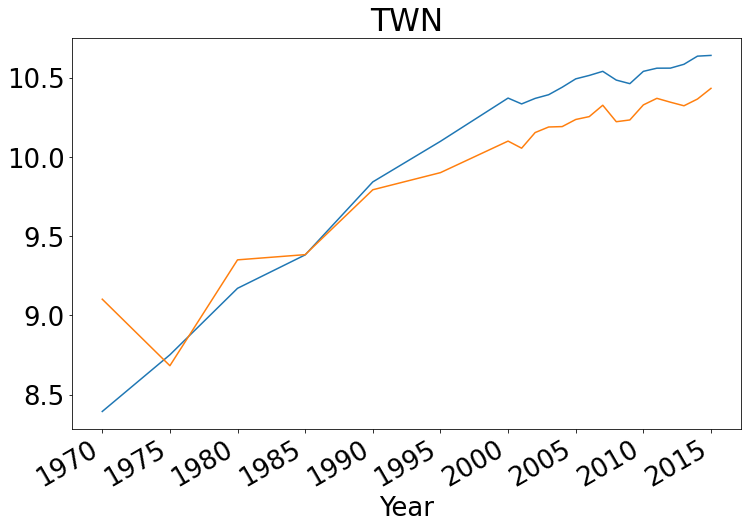

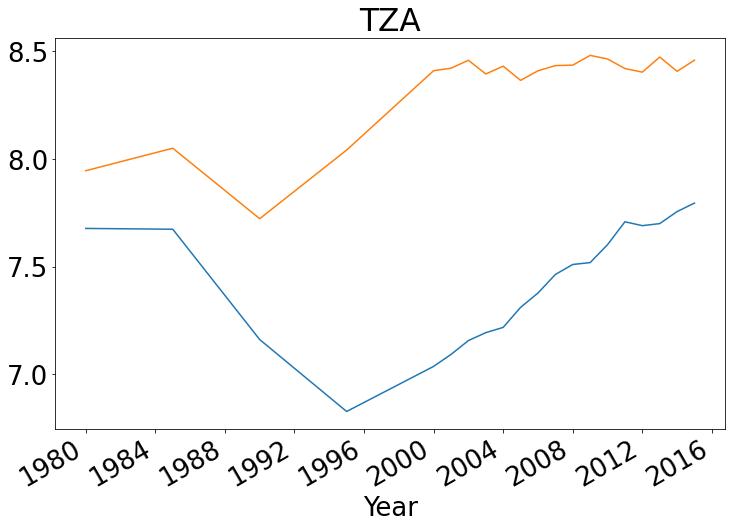

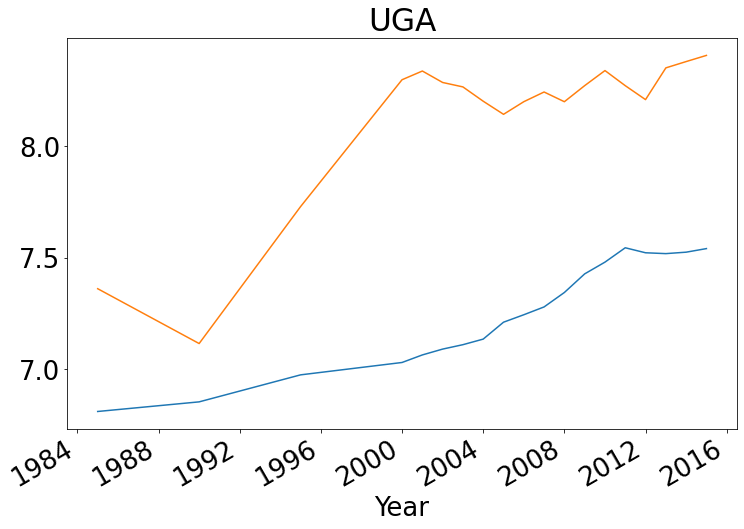

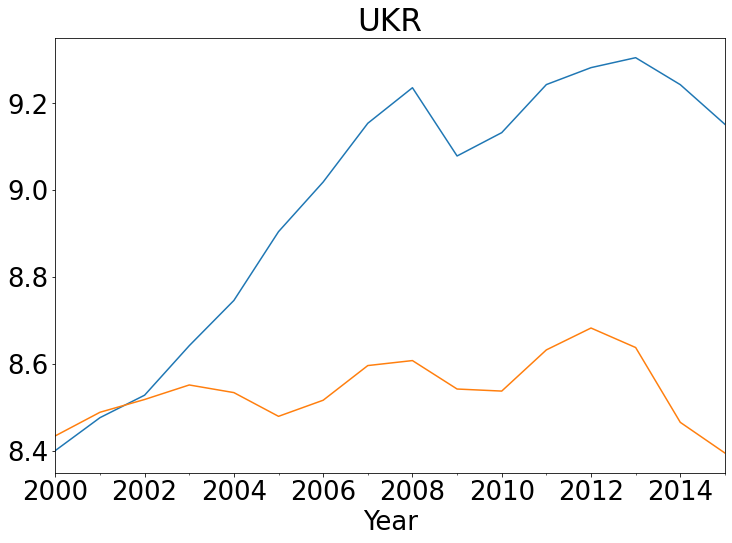

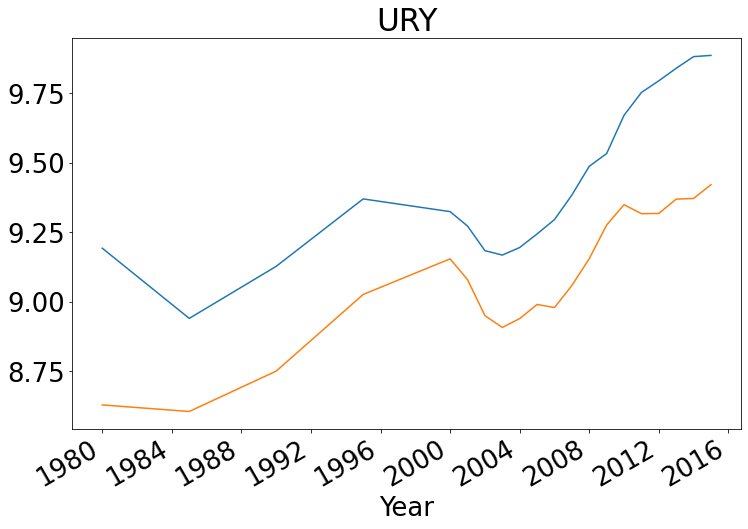

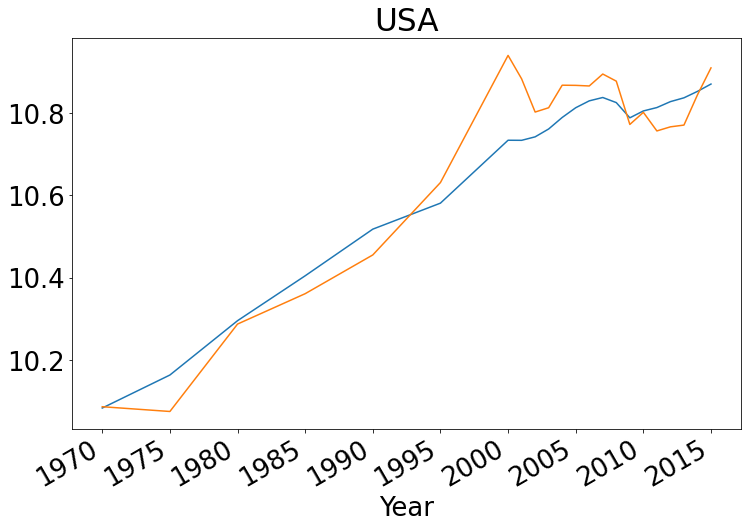

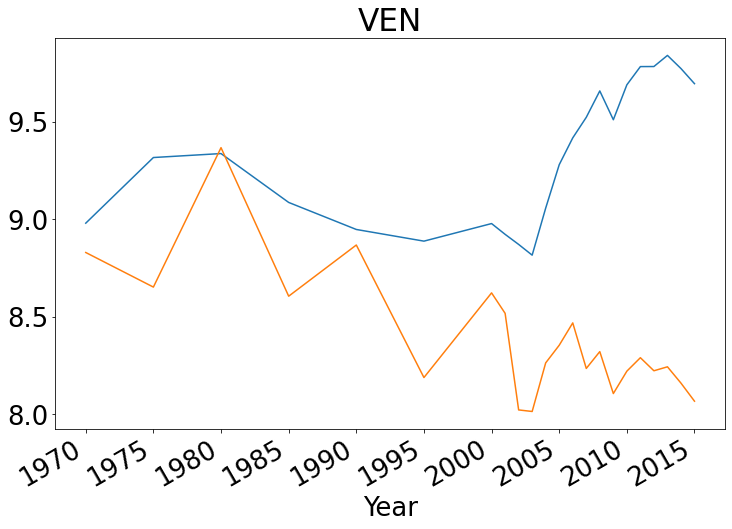

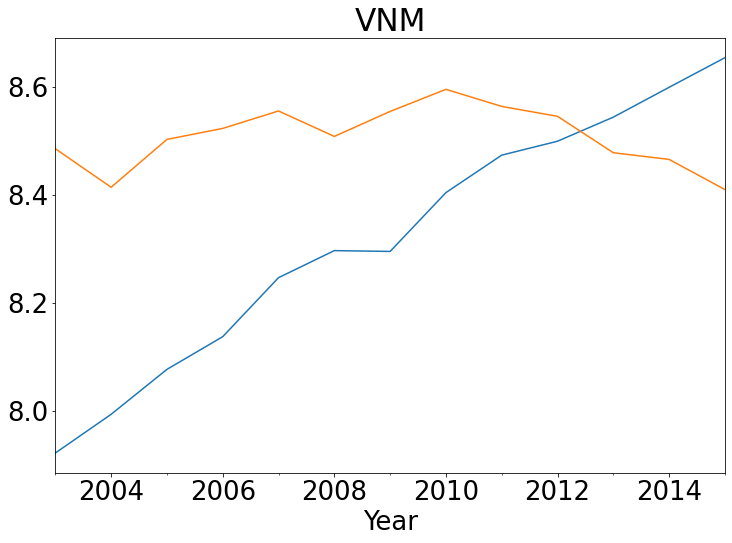

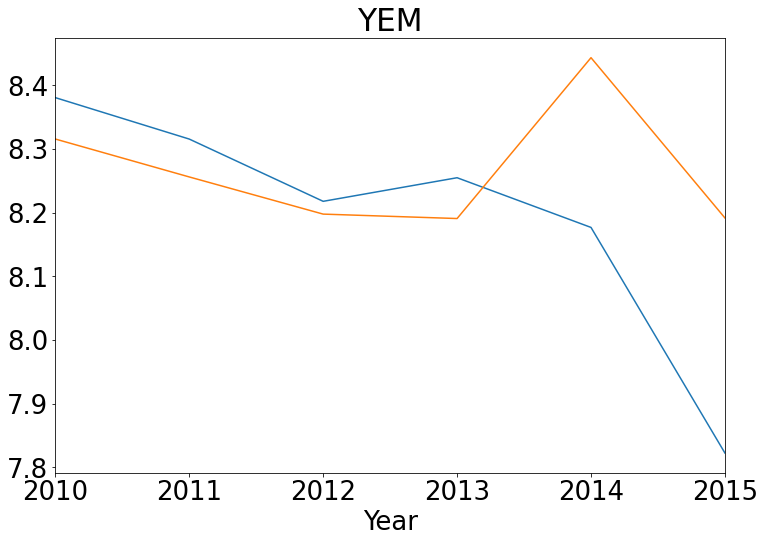

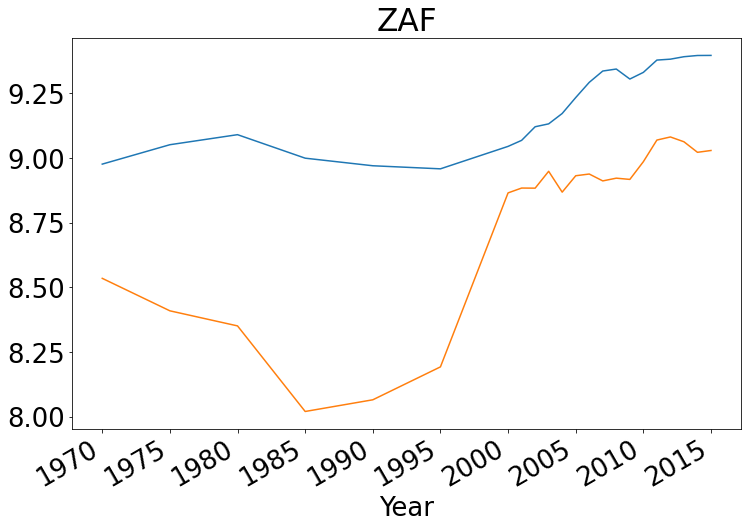

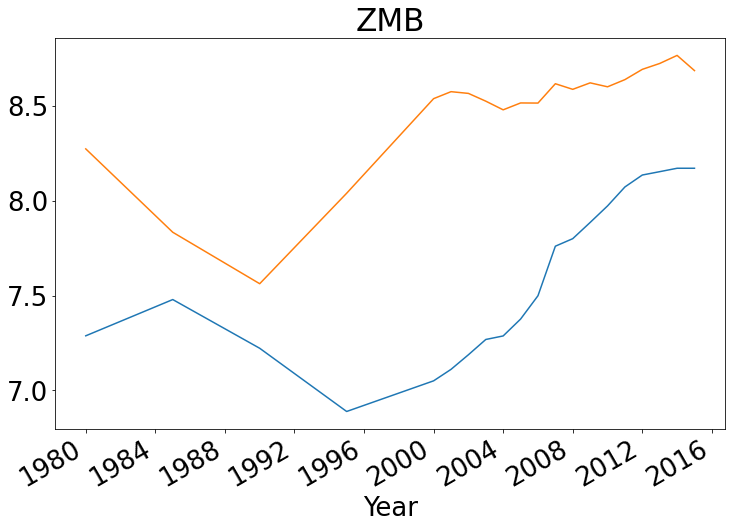

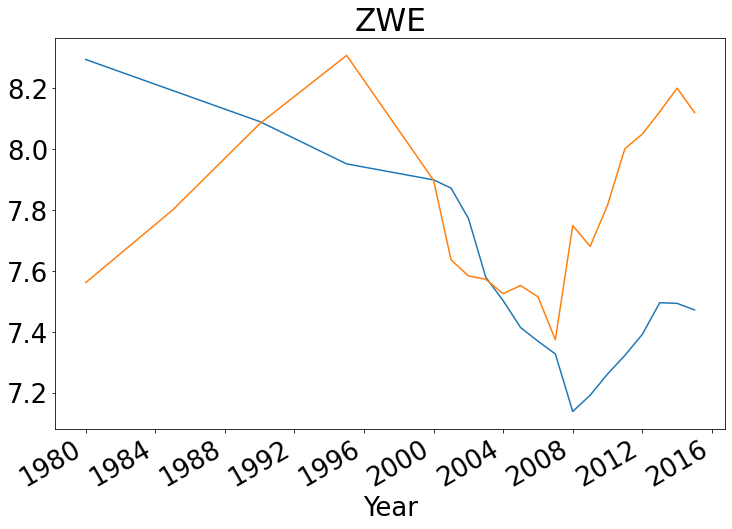

In [17]:
countries = reg_data.groupby("ISO_Code").mean().index
for country in countries:
    fig, ax = plt.subplots(figsize = (12,8))
    # Takes cumulative product
    reg_data[y_var + [y_var[0] + " Predictor"]].loc[country].plot.line(ax = ax,
                                                                      legend = False)
    ax.set_title(country)
    plt.show()
    plt.close()